In [1]:
import numpy as np
from math import *
import matplotlib.pylab as plt
import pandas as pd
from pathlib import Path
import matplotlib.colors
import seaborn as sns

import os
import shutil
import imageio

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
%matplotlib inline
csfont = {'fontname':'Times New Roman'}

In [3]:
# path = Path(r"/content/DATA.xlsx")
path = Path(r'/Users/maryiakalinina/Desktop/DATA_INDIA#2.xlsx')

df_ues = pd.read_excel(path , sheet_name='DATA', skiprows=0)
df_ues.head()
df_ues.tail(4)

,S.No,Plug NO.,Well No.,Field,Well No..1,Formatoin,Depth,Gross Lithology,Length(mm),Diameter (mm),...,Sample ID,TC par avg,TC perp avg,Anisotropy Coefficient,VHC,HC par,HC perp,Unnamed: 24,Unnamed: 25,Unnamed: 26
41,43,GM-19,Gamij-56,1,NaN,NaN,837.84,Sandstone,26.81,25.55,...,GM19,1.823033,1.513854,1.204233,2.283767,0.215433,0.199133,NaN,NaN,NaN
42,44,GM-22,Gamij-56,1,NaN,NaN,840.66,Silty shale,25.76,25.45,...,GM22,1.472133,1.081118,1.361676,1.826367,0.136333,0.093900,NaN,NaN,NaN
43,45,GM-25,Gamij-56,1,NaN,NaN,841.14,Siltstone,26.97,25.50,...,GM25,1.181633,1.032215,1.144755,2.182767,0.113067,0.166967,NaN,NaN,NaN
44,46,GM-26,Gamij-56,1,NaN,NaN,841.16,Siltstone,26.54,25.51,...,GM26,0.960700,0.651606,1.474358,1.887333,0.085000,0.096367,NaN,NaN,NaN


In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
df_ues.head(5)

,S.No,Plug NO.,Well No.,Field,Well No..1,Formatoin,Depth,Gross Lithology,Length(mm),Diameter (mm),Weight (g),Porosity,Permeability,K_Permeability,Density,Min Density,Unnamed: 16,Sample ID,TC par avg,TC perp avg,Anisotropy Coefficient,VHC,HC par,HC perp,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NG-1,Nawagam-304,0,Nawagam-304,KALOL-IX,1340.84,Shale/Siltstone,28.04,25.51,30.049,17.38750,0.083866,0.052647,2.083817,2.522398,NaN,NG01,1.352967,0.673622,2.008495,2.080067,0.038200,0.045600,NaN,-0.548535,0.880748
1,2,NG-4,Nawagam-304,0,NaN,NaN,1341.74,Siltstone-shale lamination,26.48,25.58,25.911,17.37005,0.028986,0.015632,1.877904,2.272668,NaN,NG04,1.345767,0.572039,2.352579,2.023367,0.094633,0.152633,NaN,NaN,NaN
2,4,NG-6,Nawagam-304,0,NaN,NaN,1345.18,Siltstone,28.71,25.58,31.615,17.14700,1.287660,1.089390,2.138910,2.581572,NaN,NG06,1.443300,0.945374,1.526698,2.043400,0.059967,0.031633,NaN,NaN,NaN
3,5,NG-8,Nawagam-304,0,NaN,NaN,1345.58,Siltstone,26.78,25.60,29.669,16.68545,1.556235,1.326940,2.158634,2.590945,NaN,NG08,1.508700,0.814507,1.852287,1.956400,0.071233,0.066567,NaN,NaN,NaN
4,6,NG-9,Nawagam-304,0,NaN,NaN,1345.96,Siltstone,27.82,25.56,30.997,17.23075,10.033730,9.323540,2.158939,2.608383,NaN,NG09,1.511767,0.979010,1.544179,2.003167,0.040800,0.061900,NaN,NaN,NaN


In [5]:
Nawagam = df_ues[df_ues['Well No.'].str.contains('Nawagam')]
Gamij = df_ues[df_ues['Well No.'].str.contains('Gamij')]
Nawagam.describe()

,S.No,Field,Depth,Length(mm),Diameter (mm),Weight (g),Porosity,Permeability,K_Permeability,Density,Min Density,Unnamed: 16,TC par avg,TC perp avg,Anisotropy Coefficient,VHC,HC par,HC perp,Unnamed: 24,Unnamed: 25,Unnamed: 26
count,31.000000,31.0,31.00000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,0.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,0.0,1.000000,1.000000
mean,16.935484,0.0,1369.56129,27.101613,25.520968,29.674903,17.096548,2.846178,2.665432,2.125614,2.564420,NaN,1.471044,1.008085,1.501379,2.000317,0.091153,0.064172,NaN,-0.548535,0.880748
std,9.201215,0.0,24.06291,0.715747,0.087877,1.564483,1.495353,9.735642,9.393369,0.099956,0.122264,NaN,0.112566,0.186136,0.261233,0.076917,0.078057,0.039067,NaN,NaN,NaN
min,1.000000,0.0,1340.84000,25.430000,25.340000,25.911000,14.158150,0.020816,0.010593,1.877904,2.265484,NaN,1.175367,0.572039,1.162377,1.718867,0.038200,0.031633,NaN,-0.548535,0.880748
25%,9.500000,0.0,1354.30000,26.485000,25.455000,29.296500,16.210850,0.040725,0.023391,2.094860,2.523991,NaN,1.413217,0.915908,1.293477,1.986517,0.047217,0.039367,NaN,-0.548535,0.880748
50%,17.000000,0.0,1360.55000,27.050000,25.560000,29.669000,16.818450,0.191892,0.137325,2.138910,2.569709,NaN,1.493333,0.979010,1.525522,2.003167,0.071233,0.052067,NaN,-0.548535,0.880748
75%,24.500000,0.0,1391.55000,27.710000,25.580000,30.405500,17.504325,0.995588,0.832660,2.168414,2.615210,NaN,1.539917,1.173611,1.648321,2.038100,0.089550,0.067417,NaN,-0.548535,0.880748
max,32.000000,0.0,1410.50000,28.710000,25.680000,33.395000,21.540500,53.526000,51.691350,2.364397,2.870151,NaN,1.635567,1.323884,2.352579,2.134800,0.445133,0.186500,NaN,-0.548535,0.880748


In [6]:
Gamij.describe()

,S.No,Field,Depth,Length(mm),Diameter (mm),Weight (g),Porosity,Permeability,K_Permeability,Density,Min Density,Unnamed: 16,TC par avg,TC perp avg,Anisotropy Coefficient,VHC,HC par,HC perp,Unnamed: 24,Unnamed: 25,Unnamed: 26
count,14.0000,14.0,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,0.0,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,0.0,0.0,0.0
mean,39.5000,1.0,933.741429,26.793571,25.629286,29.775214,22.080943,4.231636,3.889708,2.144691,2.746104,NaN,1.343421,0.955919,1.496801,2.009686,0.133038,0.091874,NaN,NaN,NaN
std,4.1833,0.0,72.764534,0.824291,0.151884,4.606872,5.716782,5.300703,5.006915,0.302503,0.244526,NaN,0.353782,0.393662,0.298116,0.175776,0.065124,0.052813,NaN,NaN,NaN
min,33.0000,1.0,837.800000,25.740000,25.410000,25.566000,10.403600,0.037806,0.020946,1.887805,2.465324,NaN,0.869167,0.504262,1.110785,1.826367,0.050533,0.030967,NaN,NaN,NaN
25%,36.2500,1.0,841.145000,26.472500,25.502500,26.925250,21.746112,0.268844,0.200315,1.929859,2.537163,NaN,1.150825,0.619003,1.230166,1.880383,0.083325,0.046933,NaN,NaN,NaN
50%,39.5000,1.0,983.745000,26.700000,25.620000,27.759500,24.036800,2.548637,2.235513,2.035658,2.675556,NaN,1.257233,0.886449,1.418017,1.961600,0.121000,0.080883,NaN,NaN,NaN
75%,42.7500,1.0,987.132500,26.930000,25.742500,30.031250,25.406725,6.069040,5.542786,2.192617,2.914984,NaN,1.462658,1.075599,1.772181,2.137850,0.176392,0.123758,NaN,NaN,NaN
max,46.0000,1.0,989.500000,28.560000,25.900000,41.750000,29.007550,18.541750,17.535350,2.899535,3.236218,NaN,2.006267,1.736820,1.915034,2.360500,0.266200,0.199133,NaN,NaN,NaN


In [7]:
fig = plt.figure(layout='constrained', figure6.tight_layout(pad=5.0))
axs = fig.subplots(1, 5, sharex=False)
# fig.tight_layout(pad=2.0)

# fluid_lam=0.025
# matrix_lam = [(6.90, fluid_lam), (5.02, fluid_lam),
#               (3.03, fluid_lam), (3.45, fluid_lam),
#               (3.97, fluid_lam)] # значение теплопровдности из уравненения регрессии


# for ax, mlam in zip(axs, matrix_lam):

#     ax.fill_between(porosity, tc_hs_up, tc_hs_dw, color='r', alpha=.1, label='HS')

#     # ax.set_xlabel('λ эфф, Вт/(м∙К)', fontsize=16, **csfont)
#     # ax.set_ylabel('Пористость, %', fontsize=16, **csfont)

# #     ax.set_xscale('log', base=2)
#     ax.grid(which='major', axis='both', linestyle='--')
# #     ax.legend(loc='best', fontsize='medium')
#     ax.set_xlim([0, 0.16])
#     ax.set_ylim([2, 5])

#     ax.set_xticks(np.arange(0, 0.17, 0.04), fontsize=20, **csfont)
#     ax.set_yticks(np.arange(2, 5.1, 1), fontsize=20, **csfont)


x_value, y_value = "Porosity", "Depth"

# ci = 1.96 * np.std(df_qza[y_value])/np.sqrt(len(x=df_qza[y_value]))
# axs[0].fill_between(df_qza[x_value]/100, (y-3*ci), (y+3*ci), color='b', alpha=.1, label='Доверительный интервал (0.95)')

axs[0].scatter(Nawagam["Porosity"], Nawagam[y_value], label='Qz(a)', color='RoyalBlue')
axs[0].scatter(Gamij["Porosity"], Gamij[y_value], label='Qz(a)', color='Red')
axs[0].grid(which='major', axis='both', linestyle='--')
axs[0].invert_yaxis()
axs[0].set_xscale("linear")
# axs[0].set_xlim([10, 30])
# axs[0].set_xticks(np.arange(10, 35, 5), fontsize=20, **csfont)

x_value = "Permeability"
axs[1].scatter(Nawagam[x_value ], Nawagam[y_value], label='Qz(a)', color='RoyalBlue')
axs[1].scatter(Gamij[x_value ], Gamij[y_value], label='Qz(a)', color='Red')
axs[1].grid(which='major', axis='both', linestyle='--')
axs[1].invert_yaxis()
# axs[1].set_xscale('log', base=10)
# axs[1].set_xlim([0, 10**2])
axs[1].set_xlabel('Проницаемость, мД', fontsize=16, **csfont)
axs[1].set_ylabel('Глубина, м', fontsize=16, **csfont)


x_value = "TC par avg"
axs[2].scatter(Nawagam[x_value ], Nawagam[y_value], label='Qz(a)', color='RoyalBlue')
axs[2].scatter(Gamij[x_value ], Gamij[y_value], label='Qz(a)', color='Red')
axs[2].grid(which='major', axis='both', linestyle='--')
axs[2].invert_yaxis()
axs[2].set_xscale("linear")
axs[2].set_xlabel('Теплопроводность парл', fontsize=16, **csfont)
axs[2].set_ylabel('Глубина, м', fontsize=16, **csfont)
# axs[2].set_xlim([0, 4])
# axs[2].set_xticks(np.arange(0, 4.1, 0.5), fontsize=20, **csfont)


x_value = " TC perp avg"
axs[3].scatter(Nawagam[x_value ], Nawagam[y_value], label='Qz(a)', color='RoyalBlue')
axs[3].scatter(Gamij[x_value ], Gamij[y_value], label='Qz(a)', color='Red')
axs[3].grid(which='major', axis='both', linestyle='--')
axs[3].invert_yaxis()
axs[3].set_xscale("linear")
axs[3].set_xlabel('Теплопроводность парл', fontsize=16, **csfont)
axs[3].set_ylabel('Глубина, м', fontsize=16, **csfont)
# axs[3].set_xlim([0, 4])
# axs[2].set_xticks(np.arange(0, 4.1, 0.5), fontsize=20, **csfont)

x_value = "Anisotropy Coefficient"
axs[4].scatter(Nawagam[x_value ], Nawagam[y_value], label='Qz(a)', color='RoyalBlue')
axs[4].scatter(Gamij[x_value ], Gamij[y_value], label='Qz(a)', color='Red')
axs[4].grid(which='major', axis='both', linestyle='--')
axs[4].invert_yaxis()
axs[4].set_xscale("linear")
axs[4].set_xlabel('Теплопроводность парл', fontsize=16, **csfont)
axs[4].set_ylabel('Глубина, м', fontsize=16, **csfont)
# axs[3].set_xlim([0, 4])
# axs[2].set_xticks(np.arange(0, 4.1, 0.5), fontsize=20, **csfont



plt.show()

SyntaxError: positional argument follows keyword argument (2910462016.py, line 1)

In [ ]:
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

In [ ]:
!apt-get install -y fonts-liberation
!rm /usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/LiberationSans-Regular.ttf
!ln -s /usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf /usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/
!rm /root/.cache/matplotlib/fontlist-v310.json

In [ ]:
!apt-get install -y fonts-liberation

In [ ]:
fig = plt.figure(constrained_layout=False, figsize=(18, 7))
# fig.tight_layout(pad=0.001000)
axs = fig.subplots(1, 5,  sharex=False)

ticks_size, label_size = 16, 18

for ax in axs:
    ax.grid(which='major', axis='both', linestyle='-')
    ax.set_ylabel("$Глубина, м$", fontsize=label_size, **csfont, fontweight='bold')
    ax.set_ylim([800, 1500])
    ax.invert_yaxis()
    ax.set_yticks(np.arange(800, 1550, 100))
    ax.set_yticklabels(np.arange(800, 1550, 100), fontsize=ticks_size, **csfont)

    ax.fill_between(np.linspace(0, 100, 100),
                    [Gamij["Depth"].min() - 10]*len(np.linspace(0, 100, 100)),
                    [Gamij["Depth"].max() + 60]*len(np.linspace(0, 100, 100)),
                    color='r', alpha=.1)

    ax.fill_between(np.linspace(0, 100, 100),
                [Nawagam["Depth"].min() - 10]*len(np.linspace(0, 100, 100)),
                [Nawagam["Depth"].max() + 60]*len(np.linspace(0, 100, 100)),
                color='RoyalBlue', alpha=.1)

x_value, y_value = "Porosity", "Depth"
axs[0].scatter(Nawagam["Porosity"], Nawagam[y_value], color='RoyalBlue', s=30)
axs[0].scatter(Gamij["Porosity"], Gamij[y_value], color='Red', s=30)
axs[0].set_xscale("linear")
axs[0].set_xlabel("$К_{п}, $"+"$\%$", fontsize=label_size, **csfont, fontweight='bold')
axs[0].set_xlim([10, 30])
axs[0].set_xticks(np.arange(10, 31, 5))
axs[0].set_xticklabels(np.arange(10, 31, 5), fontsize=ticks_size, **csfont)

x_value = "Permeability"
axs[1].scatter(Nawagam[x_value ], Nawagam[y_value], color='RoyalBlue', s=30)
axs[1].scatter(Gamij[x_value ], Gamij[y_value], color='Red', s=30)
axs[1].set_xscale('log')
axs[1].set_xlabel('${k}, мД$', fontsize=label_size, **csfont, fontweight='bold')
axs[1].set_xlim([10**-2, 10**2])
axs[1].set_xticks(np.logspace(-2, 2, num=5))
axs[1].set_xticklabels(np.logspace(-2, 2, num=5), fontsize=ticks_size, **csfont)


x_value = "TC par avg"
axs[2].scatter(Nawagam[x_value ], Nawagam[y_value], color='RoyalBlue', s=30)
axs[2].scatter(Gamij[x_value ], Gamij[y_value], color='Red', s=30)
axs[2].set_xscale("linear")
axs[2].set_xlabel("$\lambda_{\parallel}, $"+"$ Вт/({м}\cdot{K})$", fontsize=label_size, **csfont, fontweight='bold')
axs[2].set_xlim([0, 2.5])
axs[2].set_xticks(np.arange(0, 2.6, 0.5))
axs[2].set_xticklabels(np.arange(0, 2.6, 0.5), fontsize=ticks_size, **csfont)

x_value = " TC perp avg"
axs[3].scatter(Nawagam[x_value ], Nawagam[y_value], color='RoyalBlue', s=30)
axs[3].scatter(Gamij[x_value ], Gamij[y_value], color='Red', s=30)
axs[3].set_xscale("linear")
axs[3].set_xlabel("$\lambda_{\perp}, $"+"$ Вт/({м}\cdot{K})$", fontsize=label_size, **csfont)
axs[3].set_xlim([0, 2.0])
axs[3].set_xticks(np.arange(0, 2.1, 0.5))
axs[3].set_xticklabels(np.arange(0, 2.1, 0.5), fontsize=ticks_size, **csfont)


x_value = "Anisotropy Coefficient"
axs[4].scatter(Nawagam[x_value ], Nawagam[y_value], color='RoyalBlue', s=30, label="Навагам")
axs[4].scatter(Gamij[x_value ], Gamij[y_value], color='Red', s=30, label="Гамидж")
axs[4].set_xscale("linear")
axs[4].set_xlabel('${K}$', fontsize=label_size, **csfont)
axs[4].set_xlim([1, 2.5])
axs[4].set_xticks(np.arange(1, 2.6, 0.5))
axs[4].set_xticklabels(np.arange(1, 2.6, 0.5), fontsize=ticks_size, **csfont)

plt.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.001),
          fancybox=True, shadow=True, ncol=2, fontsize=16)

plt.savefig('india#2_ru2.jpg', dpi=300, bbox_inches='tight')

plt.show()

In [8]:
Gamij.shape, Nawagam.shape

((14, 27), (31, 27))

In [9]:
features = ["Porosity", "Permeability", "K_Permeability", "Density", \
            "Min Density", "TC par avg", " TC perp avg", "Anisotropy Coefficient", "VHC", "HC par", "HC perp"]

In [10]:
Gamij[features].describe().loc[['mean', 'std', 'min', 'max']]

,Porosity,Permeability,K_Permeability,Density,Min Density,TC par avg,TC perp avg,Anisotropy Coefficient,VHC,HC par,HC perp
mean,22.080943,4.231636,3.889708,2.144691,2.746104,1.343421,0.955919,1.496801,2.009686,0.133038,0.091874
std,5.716782,5.300703,5.006915,0.302503,0.244526,0.353782,0.393662,0.298116,0.175776,0.065124,0.052813
min,10.403600,0.037806,0.020946,1.887805,2.465324,0.869167,0.504262,1.110785,1.826367,0.050533,0.030967
max,29.007550,18.541750,17.535350,2.899535,3.236218,2.006267,1.736820,1.915034,2.360500,0.266200,0.199133


In [11]:
Nawagam[features].describe().loc[['mean', 'std', 'min', 'max']].apply(lambda x: np.round(x, 2))

,Porosity,Permeability,K_Permeability,Density,Min Density,TC par avg,TC perp avg,Anisotropy Coefficient,VHC,HC par,HC perp
mean,17.10,2.85,2.67,2.13,2.56,1.47,1.01,1.50,2.00,0.09,0.06
std,1.50,9.74,9.39,0.10,0.12,0.11,0.19,0.26,0.08,0.08,0.04
min,14.16,0.02,0.01,1.88,2.27,1.18,0.57,1.16,1.72,0.04,0.03
max,21.54,53.53,51.69,2.36,2.87,1.64,1.32,2.35,2.13,0.45,0.19


In [12]:
Gamij[features].describe().loc[['mean', 'std', 'min', 'max']].apply(lambda x: np.round(x, 2))

,Porosity,Permeability,K_Permeability,Density,Min Density,TC par avg,TC perp avg,Anisotropy Coefficient,VHC,HC par,HC perp
mean,22.08,4.23,3.89,2.14,2.75,1.34,0.96,1.50,2.01,0.13,0.09
std,5.72,5.30,5.01,0.30,0.24,0.35,0.39,0.30,0.18,0.07,0.05
min,10.40,0.04,0.02,1.89,2.47,0.87,0.50,1.11,1.83,0.05,0.03
max,29.01,18.54,17.54,2.90,3.24,2.01,1.74,1.92,2.36,0.27,0.20


In [13]:

path = Path(r'/Users/maryiakalinina/Desktop/DATA_INDIA#2.xlsx')
df_ues = pd.read_excel(path , sheet_name='NMR', skiprows=0)
df_ues.head()
df_ues.tail(4)

,№,ID,Well No.,Formatoin,Depth,Lithology,Porosity(PIK),Permeability(PIK),Permeability_KL(PIK),Vol_density,Min_density,Геометрический объем образца,Общий объем по ЯМР (мл),Общий объем по ЯМР с учетом тары (мл),Пористость* по ЯМР (%),CBW,Пористость капиллярно-связанной воды BVI (%) 10мс,Мобильная / открытая пористость FFI (%),Эффективная пористость EFF: BVI+FFI (%)
5,6,GM-17,Gamij-31,KALOL-VI & VII,989.50,Siltstone/Siltyshale глин. алеврит./глин.алевролит.,12.24780,0.037806,0.020946,2.298893,2.619755,14.350,0.619,0.558,3.888502,4.3,0.0000,0.065,0.0650
6,7,GM-12,Gamij-31,KALOL-VI & VII,987.16,Sandstone глин. сл. сульф.,27.15430,7.161330,6.584295,1.887805,2.591512,13.545,0.475,0.414,3.056478,3.4,0.0750,0.062,0.1370
7,8,GM-02,Gamij-31,KALOL-VI & VII,981.47,Shale алевр т/з,25.58725,0.356024,0.269088,2.203398,2.961050,13.161,0.421,0.360,2.735354,3.1,0.0012,0.089,0.0902
8,9,GM-22,Gamij-56,KALOL-VII & VIII,840.66,Silty shale слоист.,24.54375,2.681065,2.359595,2.060980,2.731357,12.931,0.244,0.183,1.415204,1.8,0.0690,0.034,0.1030


In [14]:
Nawagam = df_ues[df_ues['Well No.'].str.contains('Nawagam')]
Gamij = df_ues[df_ues['Well No.'].str.contains('Gamij')]

In [15]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats.stats import pearsonr

def func(x, a, b):
    return a*x + b
#     return a * x**b
#     return np.exp(a+b*x)
#     return a*np.log(x) + b

        ### Porosity VS CBW

x_value, y_value = "Porosity(PIK)", "CBW"
# x_value, y_value = "Permeability(PIK)", "CBW"

        ### Nawagam 
sorted_df_ar = Nawagam.sort_values(by=x_value) 
xdata_ar, ydata_ar = Nawagam[x_value], Nawagam[y_value]
popt_np, pcov_np = curve_fit(func, xdata_ar, ydata_ar)
print('Коэффициенты в уравнении', popt) # коэффициенты в уравнении
coeff_np = np.corrcoef(xdata_ar, ydata_ar)[0, 1]
print('Коэффициент корреляции', np.corrcoef(xdata_ar, ydata_ar)[0, 1])
print('Значимость по Пирсону (для линейной корреляции)', pearsonr(xdata_ar, ydata_ar))

        ### Gamij
sorted_df_ar = Gamij.sort_values(by=x_value) 
xdata_ar, ydata_ar = Gamij[x_value], Gamij[y_value]
popt_gp, pcov_gp = curve_fit(func, xdata_ar, ydata_ar)
print('Коэффициенты в уравнении', popt) # коэффициенты в уравнении
coeff_gp = np.corrcoef(xdata_ar, ydata_ar)[0, 1]
print('Коэффициент корреляции', np.corrcoef(xdata_ar, ydata_ar)[0, 1])
print('Значимость по Пирсону (для линейной корреляции)', pearsonr(xdata_ar, ydata_ar))

def nawagam_porosity(x):
    return -0.89753908*x + 20.25438742

def gamij_porosity(x):
    return -0.05492639*x + 4.25783246

# def nawagam_perm(x):
#     return -0.06388465*np.log(x) + 5.16884012

# def gamij_perm(x):
#     return -0.05492639*np.log(x) + 2.97936905

y_pred = nawagam_porosity(Nawagam[x_value])
y_true =  Nawagam[y_value]

from sklearn.metrics import r2_score
print(r2_score(y_true, y_pred))

NameError: name 'popt' is not defined

In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats.stats import pearsonr

def func(x, a, b):
#     return a*x + b
#     return a * x**b
#     return np.exp(a+b*x)
    return a*np.log(x) + b

        ### Porosity VS CBW

# x_value, y_value = "Porosity(PIK)", "CBW"
x_value, y_value = "Permeability(PIK)", "CBW"

        ### Nawagam 
sorted_df_ar = Nawagam.sort_values(by=x_value) 
xdata_ar, ydata_ar = Nawagam[x_value], Nawagam[y_value]
popt_nperm, pcov_nperm = curve_fit(func, xdata_ar, ydata_ar)
print('Коэффициенты в уравнении', popt_nperm) # коэффициенты в уравнении
coeff_nperm = np.corrcoef(xdata_ar, ydata_ar)[0, 1]
print('Коэффициент корреляции', np.corrcoef(xdata_ar, ydata_ar)[0, 1])
print('Значимость по Пирсону (для линейной корреляции)', pearsonr(xdata_ar, ydata_ar))

        ### Gamij
sorted_df_ar = Gamij.sort_values(by=x_value) 
xdata_ar, ydata_ar = Gamij[x_value], Gamij[y_value]
popt_gperm, pcov_gperm = curve_fit(func, xdata_ar, ydata_ar)
print('Коэффициенты в уравнении', popt_gperm) # коэффициенты в уравнении
coeff_gperm = np.corrcoef(xdata_ar, ydata_ar)[0, 1]
print('Коэффициент корреляции', np.corrcoef(xdata_ar, ydata_ar)[0, 1])
print('Значимость по Пирсону (для линейной корреляции)', pearsonr(xdata_ar, ydata_ar))


def nawagam_perm(x):
    return -0.06388465*np.log(x) + 5.16884012

def gamij_perm(x):
    return -0.23024687*np.log(x) + 2.97936905

from sklearn.metrics import r2_score
y_pred = nawagam_perm(Nawagam[x_value])
y_true =  Nawagam[y_value]
coeff_nperm = r2_score(y_true, y_pred)
print(r2_score(y_true, y_pred))


y_pred = gamij_perm(Gamij[x_value])
y_true =  Gamij[y_value]
print(r2_score(y_true, y_pred))
coeff_gperm = r2_score(y_true, y_pred)

NameError: name 'coeff_np' is not defined

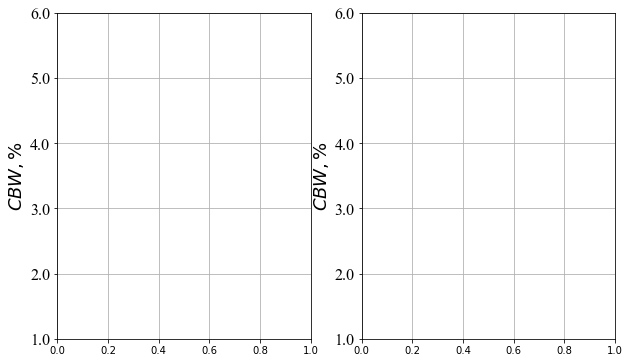

In [16]:
fig = plt.figure(constrained_layout=False, figsize=(10, 6))
# fig.tight_layout(pad=0.001000)
axs = fig.subplots(1, 2,  sharex=False)




ticks_size, label_size = 16, 18

for ax in axs:
    ax.grid(which='major', axis='both', linestyle='-')
    ax.set_ylabel("$CBW, \%$", fontsize=label_size, **csfont, fontweight='bold')
    ax.set_ylim([1, 6])
    ax.set_yticks(np.arange(1, 6.1, 1))
    ax.set_yticklabels(np.arange(1, 6.1, 1), fontsize=ticks_size, **csfont)


        ### Porosity VS CBW
        
def nawagam_porosity(x):
    return -0.89753908*x + 20.25438742

def gamij_porosity(x):
    return -0.05492639*x + 4.25783246

x_value, y_value = "Porosity(PIK)", "CBW"
Nawagam = Nawagam.sort_values(by=x_value) 

        ### Nawagam 
Nawagam_cbw_pred = nawagam_porosity(Nawagam[x_value])
axs[0].plot(Nawagam[x_value], Nawagam_cbw_pred, 
            dashes=[8, 2],
            color='RoyalBlue', 
            label='$CBW=%5.2f\cdot\phi+{%5.2f}$, '% tuple(popt_np)+'$R={%5.2f}$'%(coeff_np))
# axs[0].annotate('R2=0,82', xy=(12, 2), fontsize=24, **csfont)
# label_font_weight='bold'

        ### Gamij
Gamij = Gamij.sort_values(by=x_value) 
Gamij_cbw_pred = gamij_porosity(Gamij[x_value])
axs[0].plot(Gamij[x_value], 
            Gamij_cbw_pred, 
            dashes=[8, 2],
            color='Red',
            label='$CBW=%5.2f\cdot\phi+{%5.2f}, $'% tuple(popt_gp)+'$R={%5.2f}$'%(coeff_gp))
label_font_weight='bold'

  ### INPUT DATA
axs[0].scatter(Nawagam[x_value], Nawagam[y_value], color='RoyalBlue', s=50)
axs[0].scatter(Gamij[x_value], Gamij[y_value], color='Red', s=50)
axs[0].set_xscale("linear")
axs[0].set_xlabel("$\\phi, $"+"$\%$", fontsize=label_size, **csfont, fontweight='bold')
axs[0].set_xlim([10, 30])
axs[0].set_xticks(np.arange(10, 31, 5))
axs[0].set_xticklabels(np.arange(10, 31, 5), fontsize=ticks_size, **csfont)

axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=1, fontsize=14, labelcolor=['RoyalBlue', 'Red'])



# fig.legend(loc='center right', bbox_to_anchor=(0.5, -0.15),
#           fancybox=True, shadow=True, ncol=1, fontsize=16, labelcolor=['RoyalBlue', 'Red'])

     
    
    
    ### Permiability VS CBW
    
def nawagam_perm(x):
    return -0.06388465*np.log(x) + 5.16884012

def gamij_perm(x):
    return -0.23024687*np.log(x) + 2.97936905
    
x_value, y_value = "Permeability(PIK)", "CBW"
Nawagam = Nawagam.sort_values(by=x_value) 

        ### Nawagam 
Nawagam1_cbw_pred = nawagam_perm(Nawagam[x_value])
axs[1].plot(Nawagam[x_value], Nawagam1_cbw_pred, 
            dashes=[8, 2],
            color='RoyalBlue', 
            label='$CBW=%5.2f\cdot\ln({k})+{%5.2f},  $' % tuple(popt_nperm) +'$R^2={%5.2f}$'%(coeff_nperm))
# axs[0].annotate('R2=0,82', xy=(12, 2), fontsize=24, **csfont)
# label_font_weight='bold'

        ### Gamij
Gamij = Gamij.sort_values(by=x_value) 
Gamij1_cbw_pred = gamij_perm(Gamij[x_value])
axs[1].plot(Gamij[x_value], 
            Gamij1_cbw_pred, 
            dashes=[8, 2],
            color='Red',
            label='$CBW=%5.2f\cdot\ln({k})+{%5.2f}, $'% tuple(popt_gperm)+'$R^2={%5.2f}$'%(coeff_gperm))
label_font_weight='bold'

  ### INPUT DATA

axs[1].scatter([x_value ], Nawagam[y_value], color='RoyalBlue', s=50)
axs[1].scatter(Gamij[x_value ], Gamij[y_value], color='Red', s=50)
axs[1].set_xscale('log')
axs[1].set_xlabel('${k}, мД$', fontsize=label_size, **csfont, fontweight='bold')
axs[1].set_xlim([10**-2, 10**2])
axs[1].set_xticks(np.logspace(-2, 2, num=5))
axs[1].set_xticklabels(np.logspace(-2, 2, num=5), fontsize=ticks_size, **csfont)

axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=1, fontsize=14, labelcolor=['RoyalBlue', 'Red'])




plt.tight_layout()

line1= axs[1].scatter(Nawagam[x_value ], Nawagam[y_value], color='RoyalBlue', s=50, label='Nawagam')
line2= axs[1].scatter(Gamij[x_value ], Gamij[y_value], color='Red', s=50, label='Gamij')
# plt.legend(handles=[line1, line2])

legend3 = fig.legend(
                    handles=[line1, line2], 
                    loc='center right',
                     bbox_to_anchor=(1.2, 0.625),
                     fancybox=True, shadow=True, ncol=1,
                     fontsize=16
                    )

plt.savefig('india#2_nmr.jpg', dpi=300, bbox_inches='tight')

plt.show()

In [118]:
path = Path(r'/Users/maryiakalinina/Desktop/DATA_INDIA#2.xlsx')

df_ues = pd.read_excel(path , sheet_name='DATA', skiprows=0)
df_ues.head()
df_ues.head(4)

,S.No,Plug NO.,Well No.,Field,Well No..1,Formatoin,Depth,Gross Lithology,Length(mm),Diameter (mm),Weight (g),Porosity,Permeability,K_Permeability,Density,Min Density,Unnamed: 16,Sample ID,TC par avg,TC perp avg,Anisotropy Coefficient,VHC,HC par,HC perp,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NG-1,Nawagam-304,0,Nawagam-304,KALOL-IX,1340.84,Shale/Siltstone,28.04,25.51,30.049,17.38750,0.083866,0.052647,2.083817,2.522398,NaN,NG01,1.352967,0.673622,2.008495,2.080067,0.038200,0.045600,NaN,-0.548535,0.880748
1,2,NG-4,Nawagam-304,0,NaN,NaN,1341.74,Siltstone-shale lamination,26.48,25.58,25.911,17.37005,0.028986,0.015632,1.877904,2.272668,NaN,NG04,1.345767,0.572039,2.352579,2.023367,0.094633,0.152633,NaN,NaN,NaN
2,4,NG-6,Nawagam-304,0,NaN,NaN,1345.18,Siltstone,28.71,25.58,31.615,17.14700,1.287660,1.089390,2.138910,2.581572,NaN,NG06,1.443300,0.945374,1.526698,2.043400,0.059967,0.031633,NaN,NaN,NaN
3,5,NG-8,Nawagam-304,0,NaN,NaN,1345.58,Siltstone,26.78,25.60,29.669,16.68545,1.556235,1.326940,2.158634,2.590945,NaN,NG08,1.508700,0.814507,1.852287,1.956400,0.071233,0.066567,NaN,NaN,NaN


In [119]:
Nawagam = df_ues[df_ues['Well No.'].str.contains('Nawagam')]
Gamij = df_ues[df_ues['Well No.'].str.contains('Gamij')]
Nawagam.describe()

,S.No,Field,Depth,Length(mm),Diameter (mm),Weight (g),Porosity,Permeability,K_Permeability,Density,Min Density,Unnamed: 16,TC par avg,TC perp avg,Anisotropy Coefficient,VHC,HC par,HC perp,Unnamed: 24,Unnamed: 25,Unnamed: 26
count,31.000000,31.0,31.00000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,0.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,0.0,1.000000,1.000000
mean,16.935484,0.0,1369.56129,27.101613,25.520968,29.674903,17.096548,2.846178,2.665432,2.125614,2.564420,NaN,1.471044,1.008085,1.501379,2.000317,0.091153,0.064172,NaN,-0.548535,0.880748
std,9.201215,0.0,24.06291,0.715747,0.087877,1.564483,1.495353,9.735642,9.393369,0.099956,0.122264,NaN,0.112566,0.186136,0.261233,0.076917,0.078057,0.039067,NaN,NaN,NaN
min,1.000000,0.0,1340.84000,25.430000,25.340000,25.911000,14.158150,0.020816,0.010593,1.877904,2.265484,NaN,1.175367,0.572039,1.162377,1.718867,0.038200,0.031633,NaN,-0.548535,0.880748
25%,9.500000,0.0,1354.30000,26.485000,25.455000,29.296500,16.210850,0.040725,0.023391,2.094860,2.523991,NaN,1.413217,0.915908,1.293477,1.986517,0.047217,0.039367,NaN,-0.548535,0.880748
50%,17.000000,0.0,1360.55000,27.050000,25.560000,29.669000,16.818450,0.191892,0.137325,2.138910,2.569709,NaN,1.493333,0.979010,1.525522,2.003167,0.071233,0.052067,NaN,-0.548535,0.880748
75%,24.500000,0.0,1391.55000,27.710000,25.580000,30.405500,17.504325,0.995588,0.832660,2.168414,2.615210,NaN,1.539917,1.173611,1.648321,2.038100,0.089550,0.067417,NaN,-0.548535,0.880748
max,32.000000,0.0,1410.50000,28.710000,25.680000,33.395000,21.540500,53.526000,51.691350,2.364397,2.870151,NaN,1.635567,1.323884,2.352579,2.134800,0.445133,0.186500,NaN,-0.548535,0.880748


In [120]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats.stats import pearsonr

def func(x, a, b):
#     return a*x + b
    return a * x**b
#     return np.exp(a+b*x)
#     return a*np.log(x) + b


x_value, y_value = "Porosity", "Permeability"

        ### Nawagam 
sorted_df_ar = Nawagam.sort_values(by=x_value) 
xdata_ar, ydata_ar = Nawagam[x_value], Nawagam[y_value]
popt_nperm, pcov_nperm = curve_fit(func, xdata_ar, ydata_ar)
print('Коэффициенты в уравнении', popt_nperm) # коэффициенты в уравнении
coeff_nperm = np.corrcoef(xdata_ar, ydata_ar)[0, 1]
print('Коэффициент корреляции', np.corrcoef(xdata_ar, ydata_ar)[0, 1])
print('Значимость по Пирсону (для линейной корреляции)', pearsonr(xdata_ar, ydata_ar))


        ### Gamij
sorted_df_ar = df_ues.sort_values(by=x_value) 
xdata_ar, ydata_ar = df_ues[x_value], df_ues[y_value]
popt_gperm, pcov_gperm = curve_fit(func, xdata_ar, ydata_ar)
print('Коэффициенты в уравнении', popt_gperm) # коэффициенты в уравнении
coeff_gperm = np.corrcoef(xdata_ar, ydata_ar)[0, 1]
print('Коэффициент корреляции', np.corrcoef(xdata_ar, ydata_ar)[0, 1])
print('Значимость по Пирсону (для линейной корреляции)', pearsonr(xdata_ar, ydata_ar))


Коэффициенты в уравнении [3.33386082e-13 1.03999941e+01]
Коэффициент корреляции 0.5397783873429967
Значимость по Пирсону (для линейной корреляции) (0.5397783873429968, 0.0017242856613195413)
Коэффициенты в уравнении [0.01037254 1.97144745]
Коэффициент корреляции 0.25612120038542685
Значимость по Пирсону (для линейной корреляции) (0.25612120038542685, 0.0894659366246789)


In [121]:
def nawagam_perm(x):
    return 3.33386082e-13*x**(1.04000313e+01)

def gamij_perm(x):
    return 0.01037254*x**(1.97144745)

from sklearn.metrics import r2_score
y_pred = nawagam_perm(Nawagam[x_value])
y_true =  Nawagam[y_value]
coeff_nperm = r2_score(y_true, y_pred)
print(r2_score(y_true, y_pred))


y_pred = gamij_perm(df_ues[x_value])
y_true =  df_ues[y_value]
print(r2_score(y_true, y_pred))
coeff_gperm = r2_score(y_true, y_pred)

0.3246773314087874
0.050678765324892794


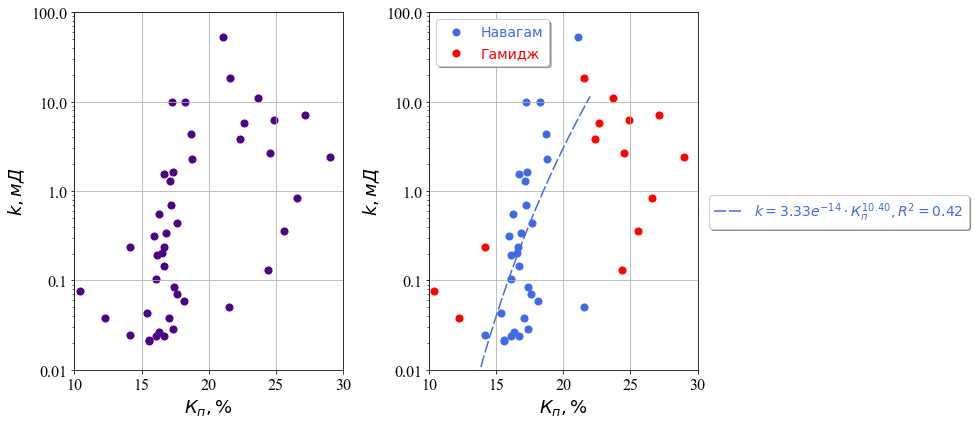

In [136]:
fig = plt.figure(constrained_layout=False, figsize=(10, 6))
# fig.tight_layout(pad=0.001000)
axs = fig.subplots(1, 2,  sharex=False)



ticks_size, label_size = 16, 18

# for ax in axs:
#     ax.grid(which='major', axis='both', linestyle='-')
#     ax.set_ylabel("$CBW, \%$", fontsize=label_size, **csfont, fontweight='bold')
#     ax.set_ylim([1, 6])
#     ax.set_yticks(np.arange(1, 6.1, 1))
#     ax.set_yticklabels(np.arange(1, 6.1, 1), fontsize=ticks_size, **csfont)


        ### Porosity VS Permeability (all samples)
        

x_value, y_value = "Porosity", "Permeability"
Nawagam = Nawagam.sort_values(by=x_value) 

  ### INPUT DATA
axs[0].scatter(df_ues[x_value], df_ues[y_value], color='indigo', s=50)
axs[0].set_xscale("linear")
axs[0].set_xlabel("$К_{п}, $"+"$\%$", fontsize=label_size, **csfont, fontweight='bold')
axs[0].set_xlim([10, 30])
axs[0].set_xticks(np.arange(10, 31, 5))
axs[0].set_xticklabels(np.arange(10, 31, 5), fontsize=ticks_size, **csfont)
axs[0].set_yscale('log', base=10)
axs[0].grid(which='major', axis='both', linestyle='-')


axs[0].set_yscale('log')
axs[0].set_ylabel('${k}, мД$', fontsize=label_size, **csfont, fontweight='bold')
axs[0].set_ylim([10**-2, 10**2])
axs[0].set_yticks(np.logspace(-2, 2, num=5))
axs[0].set_yticklabels(np.logspace(-2, 2, num=5), fontsize=ticks_size, **csfont)
        
    
    ### Porosity VS Permeability (by well)
    ### INPUT DATA
axs[1].scatter(Nawagam[x_value], Nawagam[y_value], color='RoyalBlue', s=50, label='Навагам')
axs[1].scatter(Gamij[x_value], Gamij[y_value], color='Red', s=50, label='Гамидж')
axs[1].set_xscale("linear")
axs[1].set_xlabel("$К_{п}, $"+"$\%$", fontsize=label_size, **csfont, fontweight='bold')
axs[1].set_xlim([10, 30])
axs[1].set_xticks(np.arange(10, 31, 5))
axs[1].set_xticklabels(np.arange(10, 31, 5), fontsize=ticks_size, **csfont)
axs[1].set_yscale('log', base=10)
axs[1].grid(which='major', axis='both', linestyle='-')


axs[1].set_yscale('log')
axs[1].set_ylabel('${k}, мД$', fontsize=label_size, **csfont, fontweight='bold')
axs[1].set_ylim([10**-2, 10**2])
axs[1].set_yticks(np.logspace(-2, 2, num=5))
axs[1].set_yticklabels(np.logspace(-2, 2, num=5), fontsize=ticks_size, **csfont)

# axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
#           fancybox=True, shadow=True, ncol=1, fontsize=14, labelcolor=['RoyalBlue', 'Red'])
    
def nawagam_perm(x):
    return 3.33386082e-14*x**(10.4)

Nawagam = Nawagam.sort_values(by=x_value) 

#         ### Nawagam 
# popt_nperm = [3.33386082e-14, 10.4]
# Nawagam_pred = nawagam_perm(np.linspace(10, 25, 30))
# axs[1].plot(np.linspace(12, 22, 30), Nawagam_pred, 
#             dashes=[8, 2],
#             color='RoyalBlue', 
# #             label='${k}={%3.2e}\cdotК_{п}^{%5.2f},  $' % tuple(popt_nperm) +'$R^2={%5.2f}$'%(coeff_nperm))
#             label='${k}=3.33e^{-14}\cdotК_{п}^{10.40},  $' +'$R^2={%5.2f}$'%(coeff_nperm))
# label_font_weight='bold'

axs[1].legend(loc='upper left',
          fancybox=True, shadow=True, ncol=1, fontsize=14, labelcolor=['RoyalBlue', 'Red'])





# line1= axs[1].scatter(Nawagam[x_value ], Nawagam[y_value], color='RoyalBlue', s=50, label='Навагам')
# line2= axs[1].scatter(Gamij[x_value ], Gamij[y_value], color='Red', s=50, label='Гамидж')
# # plt.legend(handles=[line1, line2], fontsize=14)

# legend3 = fig.legend(
#                     handles=[line1, line2], 
#                     loc='lower right',
#                      fancybox=True, shadow=True, ncol=1,
#                      fontsize=14,
#                     bbox_to_anchor=(0.97, 0.25),
#                     )
coeff_nperm = 0.42
popt_nperm = [3.33386082e-14, 10.4]
Nawagam_pred = nawagam_perm(np.linspace(10, 25, 30))
line1, = axs[1].plot(np.linspace(12, 22, 30), Nawagam_pred, 
                     dashes=[8, 2],
                     color='RoyalBlue', 
                     label='${k}=3.33e^{-14}\cdotК_{п}^{10.40},  $' +'$R^2={%5.2f}$'%(coeff_nperm))
label_font_weight='bold'


legend3 = fig.legend(
                    handles=[line1], 
                    loc='center right',
                     fancybox=True, shadow=True, ncol=1,
                     fontsize=14,
                    labelcolor=['RoyalBlue'],
                    bbox_to_anchor=(1.36, 0.5)
                    )



plt.tight_layout()
plt.savefig('india#2_por_VS_permf.jpg', dpi=300, bbox_inches='tight')

plt.show()

In [18]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats.stats import pearsonr

def func(x, a, b):
#     return a*x + b
#     return a * x**b
    return a*np.exp(b*x)
#     return a*np.log(x) + b


x_value, y1_value, y2_value = "Porosity", "TC par avg", " TC perp avg"

        ### Nawagam 
sorted_df_ar = df_ues.sort_values(by=x_value) 
xdata_ar, ydata_ar = df_ues[x_value], df_ues[y1_value]
popt_nperm, pcov_nperm = curve_fit(func, xdata_ar, ydata_ar)
print('Коэффициенты в уравнении', popt_nperm) # коэффициенты в уравнении
coeff_nperm = np.corrcoef(xdata_ar, ydata_ar)[0, 1]
print('Коэффициент корреляции', np.corrcoef(xdata_ar, ydata_ar)[0, 1])
print('Значимость по Пирсону (для линейной корреляции)', pearsonr(xdata_ar, ydata_ar))


        ### Gamij
sorted_df_ar = df_ues.sort_values(by=x_value) 
xdata_ar, ydata_ar = df_ues[x_value], df_ues[y2_value]
popt_gperm, pcov_gperm = curve_fit(func, xdata_ar, ydata_ar)
print('Коэффициенты в уравнении', popt_gperm) # коэффициенты в уравнении
coeff_gperm = np.corrcoef(xdata_ar, ydata_ar)[0, 1]
print('Коэффициент корреляции', np.corrcoef(xdata_ar, ydata_ar)[0, 1])
print('Значимость по Пирсону (для линейной корреляции)', pearsonr(xdata_ar, ydata_ar))


KeyError: 'Porosity'

In [19]:
def nawagam_perm(x):
    return 2.68999497*np.exp(-0.03434025*x)

def gamij_perm(x):
    return 2.15525309*np.exp(-0.0424329*x)

from sklearn.metrics import r2_score
y_pred = nawagam_perm(df_ues[x_value])
y_true =  df_ues[y1_value]
coeff_nperm = r2_score(y_true, y_pred)
print(r2_score(y_true, y_pred))


y_pred = gamij_perm(df_ues[x_value])
y_true =  df_ues[y2_value]
print(r2_score(y_true, y_pred))
coeff_gperm = r2_score(y_true, y_pred)

KeyError: 'Porosity'

In [138]:
def func(x, a, b):
    return a*np.exp(b*x)


x_value, y1_value, y2_value = "Porosity", "TC par avg", " TC perp avg"

        ### Nawagam 
Nawagam_sort = Nawagam.sort_values(by=x_value) 
xdata_ar, ydata_ar = Nawagam_sort[x_value], Nawagam_sort[y1_value]
popt_Nawagam, pcov_Nawagam = curve_fit(func, xdata_ar, ydata_ar)
print('Коэффициенты в уравнении', popt_Nawagam) # коэффициенты в уравнении
coeff_Nawagam = np.corrcoef(xdata_ar, ydata_ar)[0, 1]
print('Коэффициент корреляции', np.corrcoef(xdata_ar, ydata_ar)[0, 1])
print('Значимость по Пирсону (для линейной корреляции)', pearsonr(xdata_ar, ydata_ar))


        ### Gamij
Gamij_sort = Gamij.sort_values(by=x_value) 
xdata_ar, ydata_ar = Gamij_sort[x_value], Gamij_sort[y1_value]
popt_Gamij, pcov_Gamij = curve_fit(func, xdata_ar, ydata_ar)
print('Коэффициенты в уравнении', popt_Gamij) # коэффициенты в уравнении
coeff_Gamij = np.corrcoef(xdata_ar, ydata_ar)[0, 1]
print('Коэффициент корреляции', np.corrcoef(xdata_ar, ydata_ar)[0, 1])
print('Значимость по Пирсону (для линейной корреляции)', pearsonr(xdata_ar, ydata_ar))


Коэффициенты в уравнении [ 2.4543856  -0.02999744]
Коэффициент корреляции -0.5758541838248791
Значимость по Пирсону (для линейной корреляции) (-0.5758541838248789, 0.0006994885785020715)
Коэффициенты в уравнении [ 3.04764894 -0.03814947]
Коэффициент корреляции -0.9284071119641145
Значимость по Пирсону (для линейной корреляции) (-0.9284071119641143, 1.6639197138876493e-06)


In [139]:
def nawagam(x):
    return 2.4543856*np.exp(-0.02999744*x)

def gamij(x):
    return 3.04764895*np.exp(-0.03814947*x)

from sklearn.metrics import r2_score
y_pred = nawagam(Nawagam[x_value])
y_true =  Nawagam[y1_value]
c_nawagam = r2_score(y_true, y_pred)
print(r2_score(y_true, y_pred))


y_pred = gamij(Gamij[x_value])
y_true =  Gamij[y1_value]
print(r2_score(y_true, y_pred))
c_gamij = r2_score(y_true, y_pred)

0.3293045265098117
0.8540071651805281


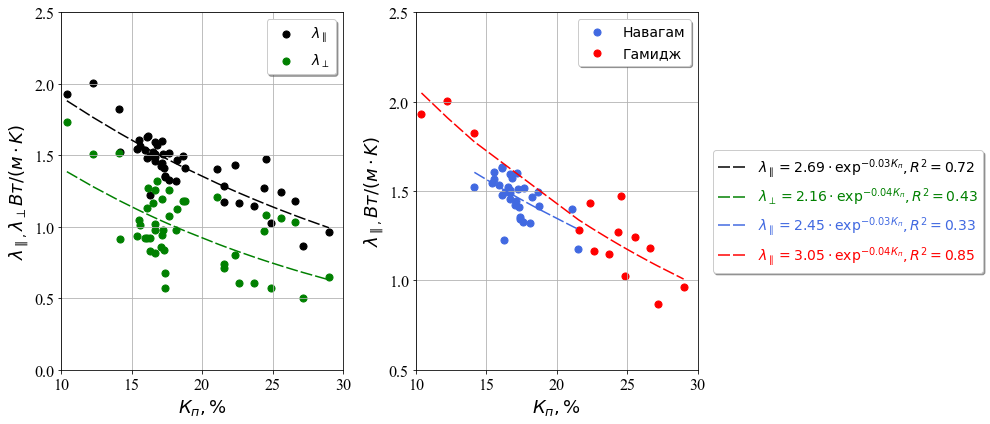

In [151]:
fig = plt.figure(constrained_layout=False, figsize=(10, 6))
# fig.tight_layout(pad=0.001000)
axs = fig.subplots(1, 2,  sharex=False)



ticks_size, label_size = 16, 18

x_value, y1_value, y2_value = "Porosity", "TC par avg", " TC perp avg"

  ### INPUT DATA
axs[0].scatter(df_ues[x_value], df_ues[y1_value], color='Black', s=50, label='$\lambda_{\parallel}$')
axs[0].scatter(df_ues[x_value], df_ues[y2_value], color='Green', s=50, label='$\lambda_{\perp}$')
axs[0].set_xscale("linear")
axs[0].set_xlabel("$К_{п},$"+"$\%$", fontsize=label_size, **csfont, fontweight='bold')
axs[0].set_xlim([10, 30])
axs[0].set_xticks(np.arange(10, 31, 5))
axs[0].set_xticklabels(np.arange(10, 31, 5), fontsize=ticks_size, **csfont)

axs[0].grid(which='major', axis='both', linestyle='-')


axs[0].set_ylabel('$\lambda_{\parallel,}\lambda_{\perp} $' + '$ Вт/({м}\cdot{K})$', 
                  fontsize=label_size, **csfont, fontweight='bold')
axs[0].set_ylim([0.0, 2.5])
axs[0].set_yticks(np.arange(0.0, 2.6, 0.5))
axs[0].set_yticklabels(np.arange(0.0, 2.6, 0.5), fontsize=ticks_size, **csfont)

axs[0].legend(loc='upper right', bbox_to_anchor=(1, 1),
          fancybox=True, shadow=True, ncol=1, fontsize=14)


        ### FIGURE 2 

### INPUT DATA
axs[1].scatter(Nawagam[x_value], Nawagam[y1_value], color='RoyalBlue', s=50, label='Навагам')
axs[1].scatter(Gamij[x_value], Gamij[y1_value], color='Red', s=50, label='Гамидж')
axs[1].set_xscale("linear")
axs[1].set_xlabel("$К_{п},$"+"$\%$", fontsize=label_size, **csfont, fontweight='bold')
axs[1].set_xlim([10, 30])
axs[1].set_xticks(np.arange(10, 31, 5))
axs[1].set_xticklabels(np.arange(10, 31, 5), fontsize=ticks_size, **csfont)

axs[1].grid(which='major', axis='both', linestyle='-')


axs[1].set_ylabel('$\lambda_{\parallel,}$' + '$ Вт/({м}\cdot{K})$', 
                  fontsize=label_size, **csfont, fontweight='bold')
axs[1].set_ylim([0.5, 2.5])
axs[1].set_yticks(np.arange(0.5, 2.6, 0.5))
axs[1].set_yticklabels(np.arange(0.5, 2.6, 0.5), fontsize=ticks_size, **csfont)

axs[1].legend(loc='upper right',
          fancybox=True, shadow=True, ncol=1, fontsize=14)



 
plt.tight_layout()

def nawagam_perm(x):
    return 2.68999497*np.exp(-0.03434025*x)

def gamij_perm(x):
    return 2.15525309*np.exp(-0.0424329*x)

all_samples = df_ues.sort_values(by=x_value) 

label_font_weight='bold'
        ### parall
    
popt_nperm = [2.68999497, -0.03434025]
coeff_nperm = 0.72

pall_pred = nawagam_perm(all_samples[x_value])
line1,  = axs[0].plot(all_samples[x_value], pall_pred, 
            dashes=[8, 2],
            color='Black', 
            label='$\lambda_{\parallel}=%5.2f\cdot\exp^{%5.2fК_{п}},  \
            $' % tuple(popt_nperm) +'$R^2={%5.2f}$'%(coeff_nperm))


        ### perp
popt_gperm = [2.15525309, -0.0424329]
coeff_gperm = 0.43
perp_pred = gamij_perm(all_samples[x_value])
line2,  = axs[0].plot(all_samples[x_value], perp_pred, 
            dashes=[8, 2],
            color='Green', 
            label='$\lambda_{\perp}=%5.2f\cdot\exp^{%5.2fК_{п}}, \
            $' % tuple(popt_gperm) +'$R^2={%5.2f}$'%(coeff_gperm))

def nawagam(x):
    return 2.4543856*np.exp(-0.02999744*x)

def gamij(x):
    return 3.04764895*np.exp(-0.03814947*x)

Nawagam = Nawagam.sort_values(by=x_value) 

popt_Nawagam = [2.4543856, -0.02999744]
c_nawagam = 0.33
        ### parall
pall_pred = nawagam(Nawagam[x_value])
line3, = axs[1].plot(Nawagam[x_value], pall_pred, 
            dashes=[8, 2],
            color='RoyalBlue', 
            label='${\lambda_{\parallel}}=%5.2f\cdot\exp^{%5.2fК_{п}},  \
            $' % tuple(popt_Nawagam) +'$R^2={%5.2f}$'%(c_nawagam))
label_font_weight='bold'


        ### perp
popt_gamij = [3.04764895, -0.03814947]
c_gamij = 0.85
Gamij = Gamij.sort_values(by=x_value) 
perp_pred = gamij(Gamij[x_value])
line4, = axs[1].plot(Gamij[x_value], perp_pred, 
            dashes=[8, 2],
            color='Red', 
            label='${\lambda_{\parallel}}=%5.2f\cdot\exp^{%5.2fК_{п}}, \
            $' % tuple(popt_Gamij) +'$R^2={%5.2f}$'%(c_gamij))
label_font_weight='bold'

# axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.17),
#               fancybox=True, shadow=True, ncol=1, fontsize=14, labelcolor=['Black', 'Green'])

# line1= axs[0].scatter(df_ues[x_value], df_ues[y1_value], color='Black', s=50, label='$\lambda_{\parallel}$')
# line2= axs[0].scatter(df_ues[x_value], df_ues[y2_value], color='Green', s=50, label='$\lambda_{\perp}$')
# # plt.legend(handles=[line1, line2], fontsize=14)

legend3 = fig.legend(
                    handles=[line1, line2, line3, line4], 
                    loc='center right',
                     fancybox=True, shadow=True, ncol=1,
                     fontsize=14,
                    bbox_to_anchor=(1.38, 0.5), labelcolor=['Black', 'Green', 'RoyalBlue', 'Red']
                    )


# line3= axs[1].scatter(Nawagam[x_value], Nawagam[y1_value], color='RoyalBlue', 
#                       s=50, label='Навагам')
# line4= axs[1].scatter(Gamij[x_value], Gamij[y1_value], color='Red',
#                       s=50, label='Гамидж')
# # plt.legend(handles=[line1, line2], fontsize=14)

# legend4 = fig.legend(
#                     handles=[line3, line4], 
#                     loc='upper right',
#                      fancybox=True, shadow=True, ncol=1,
#                      fontsize=14,
#                     bbox_to_anchor=(0.965, 0.97)
#                     )
plt.savefig('india#2_por_VS_TC_3.jpg', dpi=300, bbox_inches='tight')

import warnings
warnings.filterwarnings("ignore", message="No artists with labels found to put in legend")


plt.show()

In [153]:
path = Path(r'/Users/maryiakalinina/Desktop/DATA_INDIA#2.xlsx')
df_ues_vhc = pd.read_excel(path , sheet_name='DATA', skiprows=0)
df_ues_vhc.head()
features = ["Field", "Porosity", "Permeability", "K_Permeability", "Density", \
            "Min Density", "TC par avg", " TC perp avg", "Anisotropy Coefficient", "VHC", "HC par", "HC perp"]

In [154]:
df_ues_drop = df_ues_vhc.drop([10, 11, 26, 43])
# df_ues_drop.tail(30)

POR - VHC

Коэффициенты в уравнении [-0.01787709  2.32901296]
Коэффициент корреляции -0.6974339192703795
Значимость по Пирсону (для линейной корреляции) (-0.6974339192703797, 4.0411496810940453e-07)
0.46166906830256715
Коэффициенты в уравнении [-0.01988254  2.33694735]
Коэффициент корреляции -0.5502558632432561
Значимость по Пирсону (для линейной корреляции) (-0.5502558632432563, 0.002414985199582751)
Коэффициенты в уравнении [-0.02635565  2.56918918]
Коэффициент корреляции -0.8704842286033423
Значимость по Пирсону (для линейной корреляции) (-0.8704842286033422, 0.00010838629768244422)


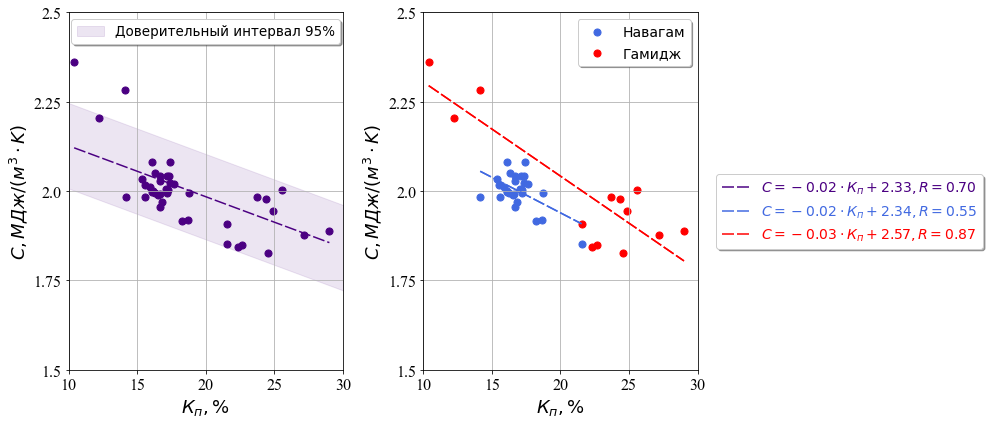

In [166]:
fig = plt.figure(constrained_layout=False, figsize=(10, 6))
# fig.tight_layout(pad=0.001000)
axs = fig.subplots(1, 2,  sharex=False)

ticks_size, label_size = 16, 18

x_value, y_value= "Porosity", "VHC"

df_ues = df_ues_drop

  ### INPUT DATA
axs[0].scatter(df_ues[x_value], df_ues[y_value], color='indigo', s=50)
axs[0].set_xscale("linear")
axs[0].set_xlabel("$К_{п},$"+"$\%$", fontsize=label_size, **csfont, fontweight='bold')
axs[0].set_xlim([10, 30])
axs[0].set_xticks(np.arange(10, 31, 5))
axs[0].set_xticklabels(np.arange(10, 31, 5), fontsize=ticks_size, **csfont)

axs[0].grid(which='major', axis='both', linestyle='-')


axs[0].set_ylabel('$C,$'+'$МДж/({м^{3}}\cdot{K})$', 
                  fontsize=label_size, **csfont, fontweight='bold')


axs[0].set_ylim([1.5, 2.5])
axs[0].set_yticks(np.arange(1.5, 2.6, 0.25))
axs[0].set_yticklabels(np.arange(1.5, 2.6, 0.25), fontsize=ticks_size, **csfont)


def func(x, w, b):
    return x*w + b

        ### all
all_sort = df_ues.sort_values(by=x_value) 
xdata_ar, ydata_ar = all_sort[x_value], all_sort[y_value]
popt_all, pcov_all = curve_fit(func, xdata_ar, ydata_ar)
print('Коэффициенты в уравнении', popt_all) # коэффициенты в уравнении
coeff_all = np.corrcoef(xdata_ar, ydata_ar)[0, 1]
print('Коэффициент корреляции', np.corrcoef(xdata_ar, ydata_ar)[0, 1])
r = np.corrcoef(xdata_ar, ydata_ar)[0, 1]
print('Значимость по Пирсону (для линейной корреляции)', pearsonr(xdata_ar, ydata_ar))

def all_values(x):
    return 2.26944887-0.01425849 *x

from sklearn.metrics import r2_score
y_pred = all_values(df_ues[x_value])
y_true =  df_ues[y_value]
r_all = r2_score(y_true, y_pred)
print(r2_score(y_true, y_pred))


# def nawagam_perm(x):
#     return 2.68999497*np.exp(-0.03434025*x)

# def gamij_perm(x):
#     return 2.15525309*np.exp(-0.0424329*x)

# all_samples = df_ues.sort_values(by=x_value) 

# label='${\lambda_{\parallel}}=%5.2f\cdot\exp^{%5.2f\phi}, $' % tuple(popt_Gamij) +'$R^2={%5.2f}$'%(c_gamij))
#         ### parall
# y_pred = all_values(all_sort[x_value])
# axs[0].plot(all_sort[x_value], y_pred, 
#             dashes=[8, 2],
#             color='Black')

# Вычисление доверительного интервала
df_ues = df_ues.sort_values(by=x_value)

# x, y = all_sort[x_value], y_pred
# ci = 1.96 * np.std(y) / np.sqrt(len(y))
# lower = y - 4*ci
# upper = y + 4*ci

# x, y = all_sort[x_value], y_pred
y_pred1 = all_values(np.linspace(10, 31, 20))
x, y = np.linspace(10, 31, 20), y_pred1
ci = 1.96 * np.std(y) / np.sqrt(len(y))
lower = y - 3*ci
upper = y + 3*ci
axs[0].fill_between(x, lower, upper, alpha=0.1, label=f'Доверительный интервал 95%', color='indigo')


# Создание графика
# axs[0].plot(x, y)
# axs[0].fill_between(x, lower, upper, alpha=0.1)
label_font_weight='bold'
axs[0].legend(loc='upper center',
          fancybox=True, shadow=True, ncol=1, fontsize=13.5)

    

    ### FIGURE 2 

### INPUT DATA

x_value, y_value = "Porosity", "VHC"

Nawagam = df_ues[df_ues['Well No.'].str.contains('Nawagam')]
Gamij = df_ues[df_ues['Well No.'].str.contains('Gamij')]

Nawagam = Nawagam.sort_values(by=x_value)
Gamij = Gamij.sort_values(by=x_value)

axs[1].scatter(Nawagam[x_value], Nawagam[y_value], color='RoyalBlue', s=50, label="Навагам")
axs[1].scatter(Gamij[x_value], Gamij[y_value], color='Red', s=50, label='Гамидж')
axs[1].set_xscale("linear")
axs[1].set_xlabel("$К_{п}, $"+"$\%$", fontsize=label_size, **csfont, fontweight='bold')
axs[1].set_xlim([10, 30])
axs[1].set_xticks(np.arange(10, 31, 5))
axs[1].set_xticklabels(np.arange(10, 31, 5), fontsize=ticks_size, **csfont)

axs[1].grid(which='major', axis='both', linestyle='-')


axs[1].set_ylabel('$C,$'+'$МДж/({м^{3}}\cdot{K})$', 
                  fontsize=label_size, **csfont, fontweight='bold')

axs[1].set_ylim([1.5, 2.5])
axs[1].set_yticks(np.arange(1.5, 2.6, 0.25))
axs[1].set_yticklabels(np.arange(1.5, 2.6, 0.25), fontsize=ticks_size, **csfont)

axs[1].legend(loc='upper right',
          fancybox=True, shadow=True, ncol=1, fontsize=14)


        ### nawagam
Nawagam_sort = Nawagam.sort_values(by=x_value) 
xdata_ar, ydata_ar = Nawagam_sort[x_value], Nawagam_sort[y_value]
popt_n, pcov_n = curve_fit(func, xdata_ar, ydata_ar)
print('Коэффициенты в уравнении', popt_n) # коэффициенты в уравнении
coeff_n = np.corrcoef(xdata_ar, ydata_ar)[0, 1]
print('Коэффициент корреляции', np.corrcoef(xdata_ar, ydata_ar)[0, 1])
n = np.corrcoef(xdata_ar, ydata_ar)[0, 1]
print('Значимость по Пирсону (для линейной корреляции)', pearsonr(xdata_ar, ydata_ar))

def nawagam(x):
    return 2.33694735-0.01988254*x

y_pred = nawagam(Nawagam_sort[x_value])
axs[1].plot(Nawagam_sort[x_value], y_pred, 
            dashes=[8, 2],
            color='RoyalBlue')

        ### gamij
Gamij_sort = Gamij.sort_values(by=x_value) 
xdata_ar, ydata_ar = Gamij_sort[x_value], Gamij_sort[y_value]
popt_g, pcov_g = curve_fit(func, xdata_ar, ydata_ar)
print('Коэффициенты в уравнении', popt_g) # коэффициенты в уравнении
coeff_g = np.corrcoef(xdata_ar, ydata_ar)[0, 1]
print('Коэффициент корреляции', np.corrcoef(xdata_ar, ydata_ar)[0, 1])
g = np.corrcoef(xdata_ar, ydata_ar)[0, 1]
print('Значимость по Пирсону (для линейной корреляции)', pearsonr(xdata_ar, ydata_ar))

def gamij(x):
    return 2.56918918-0.02635565*x

y_pred = gamij(Gamij_sort[x_value])
axs[1].plot(Gamij_sort[x_value], y_pred, 
            dashes=[8, 2],
            color='Red')
 
plt.tight_layout()

y_pred = nawagam(Nawagam_sort[x_value])
line2, = axs[1].plot(Nawagam_sort[x_value], y_pred, 
            dashes=[8, 2],
            color='RoyalBlue', 
            label='$C=%5.2f\cdotК_{п}+{%5.2f}, $' % tuple(popt_n) +'$R={%5.2f}$'%(abs(n)))

y_pred = gamij(Gamij_sort[x_value])
line3, = axs[1].plot(Gamij_sort[x_value], y_pred, 
            dashes=[8, 2],
            color='Red', 
            label='$C=%5.2f\cdotК_{п}+{%5.2f}, $' % tuple(popt_g) +'$R={%5.2f}$'%(abs(g)))

# plt.legend(handles=[line1, line2], fontsize=14)


# line1, = ax.plot(x, y, label='Line 1')
# line2, = ax.plot(x, z, label='Line 2')
# ax.legend(handles=[line1, line2])

df_ues = df_ues.sort_values(by=x_value)


y_pred = all_values(all_sort[x_value])
line1, = axs[0].plot(all_sort[x_value], y_pred, 
            dashes=[8, 2],
            color='indigo', 
            label='$C=%5.2f\cdotК_{п}+{%5.2f}, $' % tuple(popt_all) +'$R={%5.2f}$'%(abs(r)))


# plt.legend(handles=[line1, line2], fontsize=14)

legend4 = fig.legend(
                    handles=[line1, line2, line3], 
                    loc='center right',
                     fancybox=True, shadow=True, ncol=1,
                     fontsize=14,
                    bbox_to_anchor=(1.38, 0.5),
    labelcolor=['indigo', 'RoyalBlue', 'Red']
                    )


plt.savefig('india#2_por_VS_VHC1.jpg', dpi=300, bbox_inches='tight')

import warnings
warnings.filterwarnings("ignore", message="No artists with labels found to put in legend")


plt.show()

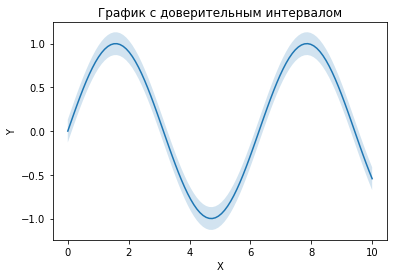

In [264]:
import matplotlib.pyplot as plt
import numpy as np

# Пример данных
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Вычисление доверительного интервала
ci = 1.96 * np.std(y) / np.sqrt(len(y))
lower = y - ci
upper = y + ci

# Создание графика
plt.plot(x, y)
plt.fill_between(x, lower, upper, alpha=0.2)

# Название осей
plt.xlabel('X')
plt.ylabel('Y')
plt.title('График с доверительным интервалом')

# Отображение графика
plt.show()

In [91]:
path = Path(r'/Users/maryiakalinina/Desktop/DATA_INDIA#2.xlsx')
df_ues = pd.read_excel(path , sheet_name='DATA', skiprows=0)
df_ues.head()
features = ["Field", "Porosity", "Permeability", "K_Permeability", "Density", \
            "Min Density", "TC par avg", " TC perp avg", "Anisotropy Coefficient", "VHC", "HC par", "HC perp"]

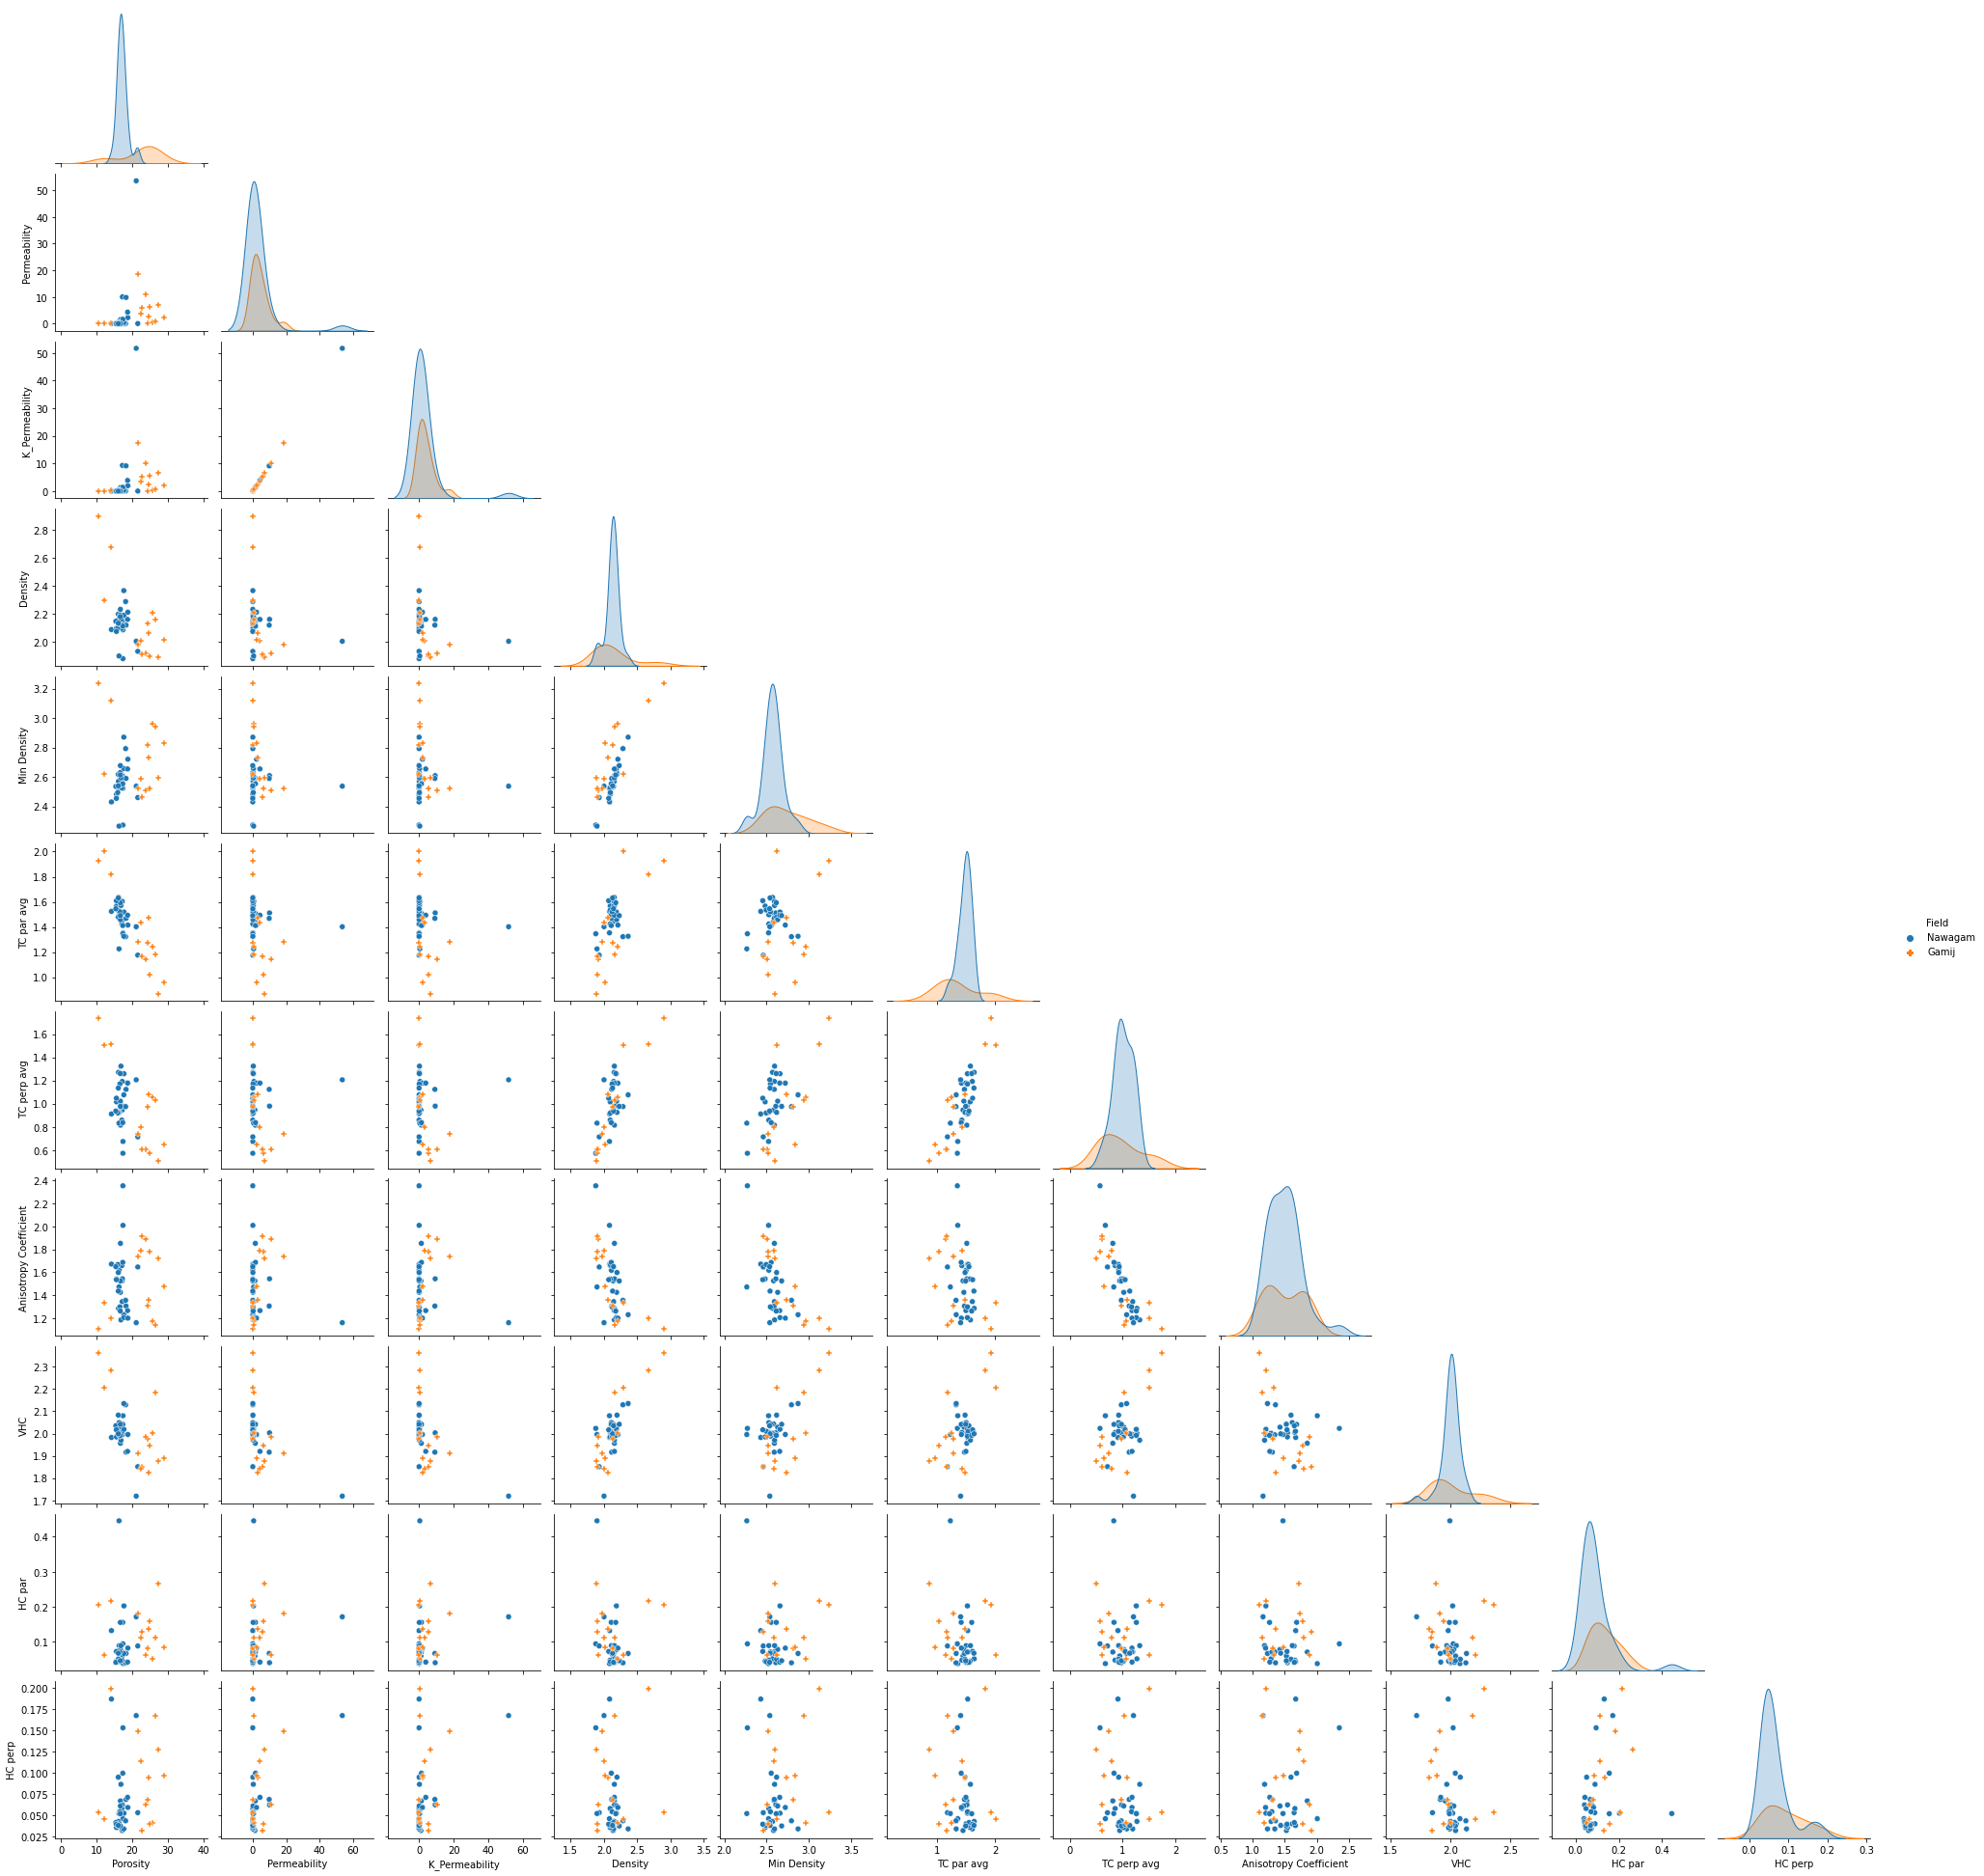

In [92]:
sns.pairplot(data=df_ues[features], 
             hue="Field",
             markers=["o", "P"], corner=True)

Text(0.5, 1.0, 'All samples')

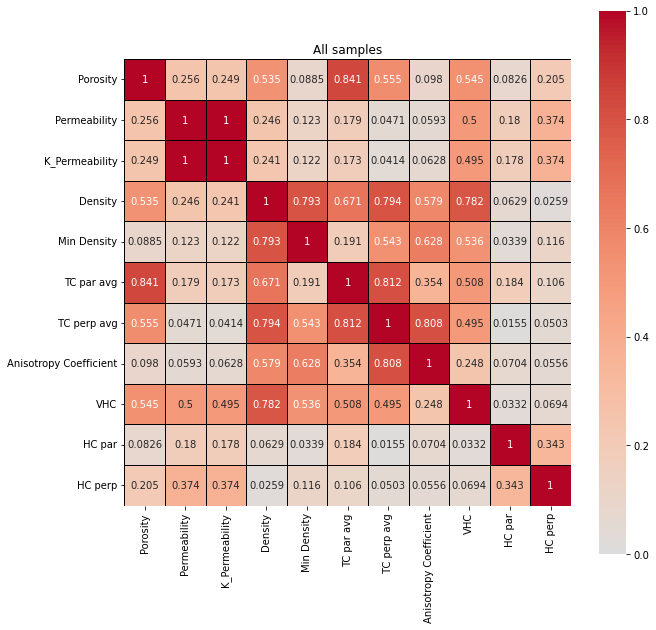

In [103]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_ues[features].corr().abs(),fmt = '.3g',square=True, 
            annot = True, vmin=0, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black')
plt.title("All samples")

Text(0.5, 1.0, 'Nawagam')

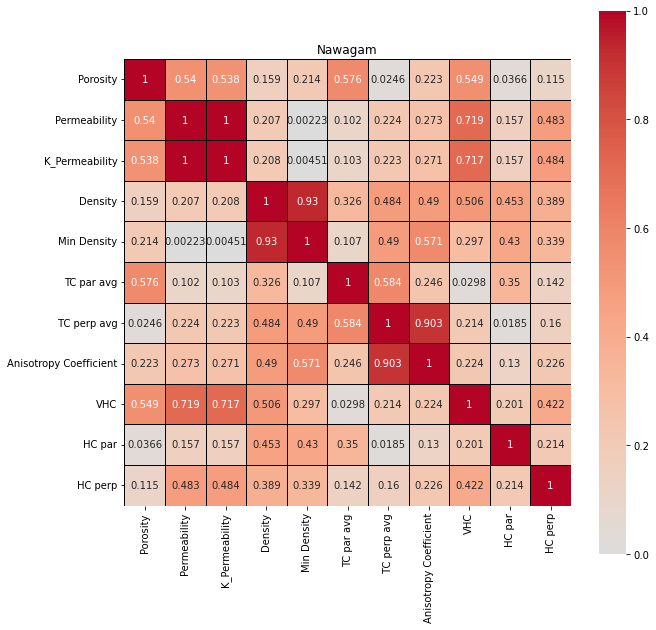

In [104]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(Nawagam[features].corr().abs(),fmt = '.3g', square=True, 
            annot = True, vmin=0, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black')
plt.title("Nawagam")

Text(0.5, 1.0, 'Gamij')

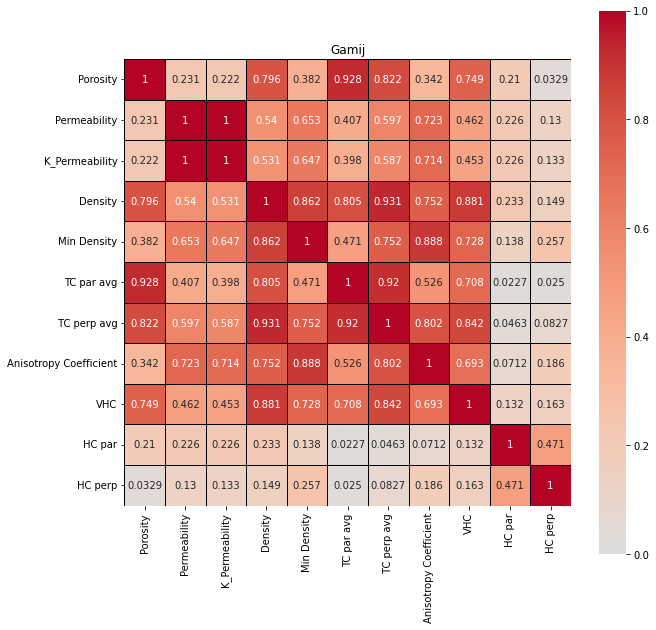

In [107]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(Gamij[features].corr().abs(),fmt = '.3g',square=True, 
            annot = True, vmin=0, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black')
plt.title("Gamij")

In [ ]:

# por-vhc (all , nawagam, gamij )
# density - tc (all , nawagam, gamij )
# density - vhc (all , nawagam, gamij )

In [20]:
path = Path(r'/Users/maryiakalinina/Desktop/DATA_INDIA#2.xlsx')
df_ues = pd.read_excel(path , sheet_name='RP#1', skiprows=0)
df_ues.head()
features = ["Field", "Porosity", "Permeability", "K_Permeability", "Density", \
            "Min Density", "TC par avg", " TC perp avg", "Anisotropy Coefficient", "VHC", "HC par", "HC perp"]

In [21]:
df_ues_drop = df_ues.drop([9, 11,12,13, 34])
df_ues_drop

,№,Group,TC matrix,Porosity,Dry,Water,Kerosene,Unnamed: 7,#,АО пор 1,conc_cracks_1,АО трещин 1,L_eff_1,L_eff_2,L_eff_3,TC_matr_1,TC_matr_2,TC_matr_3,Diff_1,Diff_2,Diff_3,Unnamed: 21,Unnamed: 22,Unnamed: 23,min,max,Unnamed: 26,Unnamed: 27,min.1,max.1,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,L-9,Fsp-Qz(a),3.03,7.581984,2.736500,3.883083,3.430367,NaN,L-9,0.10000,0.0030,0.00079,2.739651,3.879690,3.427036,3.7850,4.434,4.280,-0.012737,-0.007990,-0.086414,NaN,7.581984,2.736500,2.826843,2.952505,0.033014,0.078935,3.778841,4.128498,-2.684514,6.320109,3.511372,3.707245,2.361423,8.071390
1,L-12,Fsp-Qz(a),3.03,5.825010,2.900833,4.017367,3.621800,NaN,L-12,0.10000,0.0025,0.00100,2.901419,4.018777,3.619993,3.7400,4.456,4.302,0.048931,-0.030423,-0.000193,NaN,5.825010,2.900833,2.958757,3.090292,0.019968,0.065312,3.887920,4.252389,-3.222182,5.850161,3.662144,3.867569,1.113908,6.785831
2,L-15,Fsp-Qz(a),3.03,9.667931,2.610450,3.953533,3.277017,NaN,L-15,0.10000,0.0025,0.00100,2.610192,3.948552,3.280811,3.7850,4.698,4.324,0.007356,-0.036658,0.024726,NaN,9.667931,2.610450,2.673743,2.792555,0.024246,0.069760,3.652712,3.985351,-7.608921,0.804787,3.337537,3.522363,1.846818,7.486883
3,L-16,Fsp-Qz(a),3.03,9.998404,2.556033,3.735950,3.406850,NaN,L-16,0.10000,0.0025,0.00100,2.554916,3.739556,3.406244,3.7400,4.456,4.544,-0.198594,-0.011872,-0.110147,NaN,9.998404,2.556033,2.649833,2.767571,0.036697,0.082760,3.633057,3.963054,-2.754145,6.078887,3.310502,3.493606,-2.828074,2.546528
4,L-23,Fsp-Qz(a),3.03,9.542217,2.609267,3.763967,3.249800,NaN,L-23,0.10000,0.0040,0.00100,2.605828,3.765578,3.249253,3.9200,4.456,4.302,-0.159847,0.148351,-0.022985,NaN,9.542217,2.609267,2.682864,2.802085,0.028206,0.073897,3.660212,3.993860,-2.756514,6.107735,3.347858,3.533340,3.017344,8.724855
5,L-24,Fsp-Qz(a),3.03,9.666043,2.456433,3.728200,3.166450,NaN,L-24,0.10000,0.0040,0.00100,2.488530,3.723059,3.222538,3.7400,4.412,4.280,1.159756,-0.186086,1.657350,NaN,9.666043,2.456433,2.673880,2.792698,0.088521,0.136891,3.652825,3.985479,-2.021763,6.900878,3.337692,3.522528,5.408014,11.245330
6,L-26,Fsp-Qz(a),3.03,5.693428,2.765233,4.002783,3.546767,NaN,L-26,0.10000,0.0040,0.00100,2.798845,4.004978,3.581559,3.7400,4.434,4.280,1.041336,0.124450,0.888986,NaN,5.693428,2.765233,2.968747,3.100726,0.073597,0.121325,3.896196,4.261793,-2.662826,6.470735,3.673598,3.879749,3.575976,9.388324
7,L-27,Fsp-Qz(a),3.03,5.360051,2.674283,3.932217,3.471067,NaN,L-27,0.10000,0.0040,0.00100,2.825452,3.932586,3.612659,3.7400,4.324,4.280,5.822172,0.065802,4.111210,NaN,5.360051,2.674283,2.994127,3.127232,0.119600,0.169372,3.917233,4.285698,-0.381042,8.989354,3.702723,3.910715,6.673916,12.666089
8,L-33,Fsp-Qz(a),3.03,10.084539,2.678167,3.896400,3.436500,NaN,L-33,0.14678,0.0025,0.00071,2.681082,3.902866,3.439586,3.7400,4.610,4.412,0.040373,0.073487,-0.012035,NaN,10.084539,2.678167,2.643616,2.761075,-0.012901,0.030957,3.627948,3.957260,-6.889748,1.561943,3.303478,3.486135,-3.870870,1.444344
10,L-35,Fsp-Qz(a),3.03,9.128657,2.710217,3.913283,3.354017,NaN,L-35,0.10798,0.0020,0.00056,2.709591,3.910902,3.348613,3.7850,4.588,4.302,-0.015092,0.023069,-0.041403,NaN,9.128657,2.710217,2.712963,2.833533,0.001013,0.045500,3.684977,4.021957,-5.834147,2.777053,3.381949,3.569600,0.832799,6.427628


In [22]:
x_dry, y_dry = df_ues_drop["Dry"], df_ues_drop["L_eff_1"]
x_water, y_water = df_ues_drop["Water"], df_ues_drop["L_eff_2"]
x_kerosene, y_kerosene = df_ues_drop["Kerosene"], df_ues_drop["L_eff_3"]

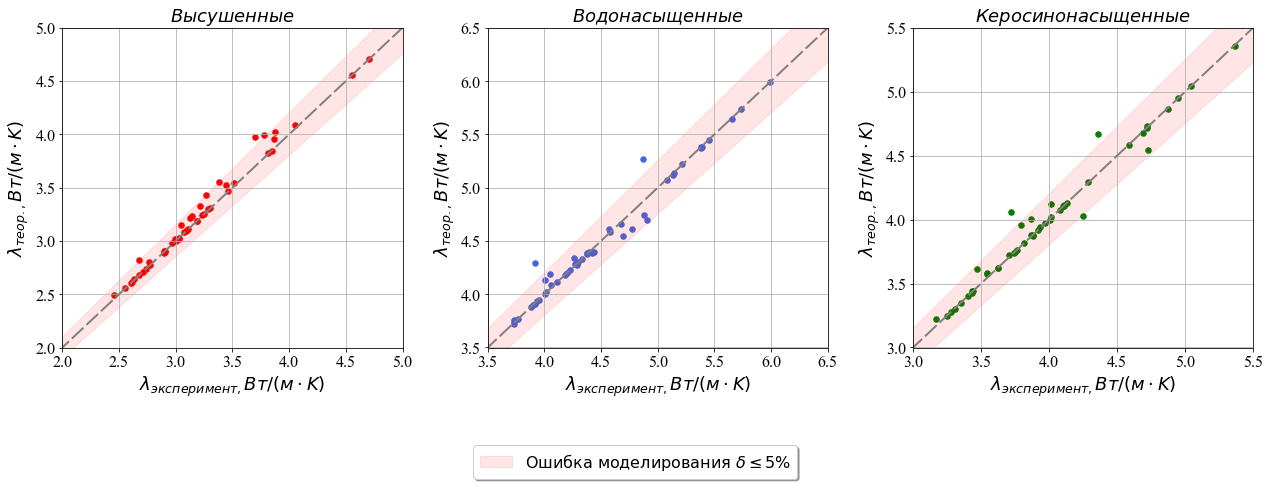

In [23]:
# figure, axs = plt.subplots(1, 3, figsize=(18, 6))
# figure.tight_layout(pad=5.0)

fig = plt.figure(constrained_layout=False, figsize=(18, 6))
# fig.tight_layout(pad=0.001000)
axs = fig.subplots(1, 3,  sharex=False)



ticks_size, label_size = 16, 18

dots = np.linspace(0, 7, 100)
dots_up = [i+i*0.05 for i in dots]
dots_dw = [i-i*0.05 for i in dots]

#plot1
axs[0].plot(dots, 
            dots, 
            dashes=[8, 2], 
            color='Gray',
            linewidth=2)

axs[0].fill_between(dots, dots_up, dots_dw, color='Red', alpha=.1)
axs[0].scatter(x_dry, y_dry,color='Red', marker='o',  alpha=1.,s=30)
axs[0].set_title(f'$Высушенные$', fontsize=label_size, **csfont)
axs[0].grid(which='major', axis='both', linestyle='-')

axs[0].set_xlabel('λ measured, W/(m·K)', fontsize=16, **csfont)
axs[0].set_xlabel('$\lambda_{эксперимент,}$' + '$ Вт/({м}\cdot{K})$', 
                  fontsize=label_size, **csfont, fontweight='bold')
axs[0].set_ylabel('$\lambda_{теор.,}$' + '$ Вт/({м}\cdot{K})$', 
                  fontsize=label_size, **csfont, fontweight='bold')


axs[0].set_xlim([2, 5])
axs[0].set_xticks(np.arange(2, 5.1, 0.5))
axs[0].set_xticklabels(np.arange(2, 5.1, 0.5), fontsize=ticks_size, **csfont)

axs[0].set_ylim([2, 5])
axs[0].set_yticks(np.arange(2, 5.1, 0.5))
axs[0].set_yticklabels(np.arange(2, 5.1, 0.5), fontsize=ticks_size, **csfont)

# axs[0].legend(loc='best', fontsize='medium')


#plot2
axs[1].scatter(x_water, y_water ,color='RoyalBlue', marker='o',  alpha=1., s=30)
axs[1].grid(which='major', axis='both', linestyle='-')
axs[1].set_title(f'$Водонасыщенные$', fontsize=label_size, **csfont)

axs[1].set_xlim([3.5, 6.5])
axs[1].set_xticks(np.arange(3.5, 6.6, 0.5))
axs[1].set_xticklabels(np.arange(3.5, 6.6, 0.5), fontsize=ticks_size, **csfont)

axs[1].set_ylim([3.5, 6.5])
axs[1].set_yticks(np.arange(3.5, 6.6, 0.5))
axs[1].set_yticklabels(np.arange(3.5, 6.6, 0.5), fontsize=ticks_size, **csfont)


axs[1].plot(dots, 
            dots, 
            dashes=[8, 2], 
            color='Gray',
            linewidth=2)
axs[1].fill_between(dots, dots_up, dots_dw, color='r', alpha=.1)
# axs[1].legend(loc='best', fontsize='medium')


axs[1].set_xlabel('$\lambda_{эксперимент,}$' + '$ Вт/({м}\cdot{K})$', 
                  fontsize=label_size, **csfont, fontweight='bold')
axs[1].set_ylabel('$\lambda_{теор.,}$' + '$ Вт/({м}\cdot{K})$', 
                  fontsize=label_size, **csfont, fontweight='bold')

#plot2
axs[2].scatter(x_kerosene, y_kerosene ,color='Green', marker='o', alpha=1., s=30)
axs[2].set_title(f'$Керосинонасыщенные$', fontsize=label_size, **csfont)

axs[2].set_xlim([3, 5.5])
axs[2].set_xticks(np.arange(3, 5.6, 0.5))
axs[2].set_xticklabels(np.arange(3, 5.6, 0.5), fontsize=ticks_size, **csfont)

axs[2].set_ylim([3, 5.5])
axs[2].set_yticks(np.arange(3, 5.6, 0.5))
axs[2].set_yticklabels(np.arange(3, 5.6, 0.5), fontsize=ticks_size, **csfont)


axs[2].grid(which='major', axis='both', linestyle='-')

axs[2].plot(dots, 
            dots, 
            dashes=[8, 2], 
            color='Gray',
            linewidth=2)
# axs[2].fill_between(dots, dots_up, dots_dw, color='r', alpha=.1)
# axs[2].legend(loc='best', fontsize='medium')

axs[2].set_xlabel('$\lambda_{эксперимент,}$' + '$ Вт/({м}\cdot{K})$', 
                  fontsize=label_size, **csfont, fontweight='bold')
axs[2].set_ylabel('$\lambda_{теор.,}$' + '$ Вт/({м}\cdot{K})$', 
                  fontsize=label_size, **csfont, fontweight='bold')


line1= axs[2].fill_between(dots, dots_up, dots_dw, color='Red', alpha=.1, 
                           label=f'Ошибка моделирования ' + '$ {\delta\leq5\%}$')
# plt.legend(handles=[line1, line2], fontsize=14)

legend3 = fig.legend(
                    handles=[line1], 
                    loc='center',
                     fancybox=True, shadow=True, ncol=1,
                     fontsize=16,
                    bbox_to_anchor=(0.5, -0.1),
                    )
plt.savefig('india#1_TC_error4.jpg', dpi=500)

plt.tight_layout(pad=2.0)
plt.show()  

In [36]:
path = Path(r'/Users/maryiakalinina/Desktop/DATA_INDIA#2.xlsx')
df_ues = pd.read_excel(path , sheet_name='DATA', skiprows=0)
df_ues.head()
features = ["Field", "Porosity", "Permeability", "K_Permeability", "Density", \
            "Min Density", "TC par avg", " TC perp avg", "Anisotropy Coefficient", "VHC", "HC par", "HC perp"]

In [25]:
df_ues.head(4)

,S.No,Plug NO.,Well No.,Field,Well No..1,Formatoin,Depth,Gross Lithology,Length(mm),Diameter (mm),Weight (g),Porosity,Permeability,K_Permeability,Density,Min Density,Unnamed: 16,Sample ID,TC par avg,TC perp avg,Anisotropy Coefficient,VHC,HC par,HC perp,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NG-1,Nawagam-304,0,Nawagam-304,KALOL-IX,1340.84,Shale/Siltstone,28.04,25.51,30.049,17.38750,0.083866,0.052647,2.083817,2.522398,NaN,NG01,1.352967,0.673622,2.008495,2.080067,0.038200,0.045600,NaN,-0.548535,0.880748
1,2,NG-4,Nawagam-304,0,NaN,NaN,1341.74,Siltstone-shale lamination,26.48,25.58,25.911,17.37005,0.028986,0.015632,1.877904,2.272668,NaN,NG04,1.345767,0.572039,2.352579,2.023367,0.094633,0.152633,NaN,NaN,NaN
2,4,NG-6,Nawagam-304,0,NaN,NaN,1345.18,Siltstone,28.71,25.58,31.615,17.14700,1.287660,1.089390,2.138910,2.581572,NaN,NG06,1.443300,0.945374,1.526698,2.043400,0.059967,0.031633,NaN,NaN,NaN
3,5,NG-8,Nawagam-304,0,NaN,NaN,1345.58,Siltstone,26.78,25.60,29.669,16.68545,1.556235,1.326940,2.158634,2.590945,NaN,NG08,1.508700,0.814507,1.852287,1.956400,0.071233,0.066567,NaN,NaN,NaN


In [ ]:

# density - tc (all , nawagam, gamij )
# density - vhc (all , nawagam, gamij )

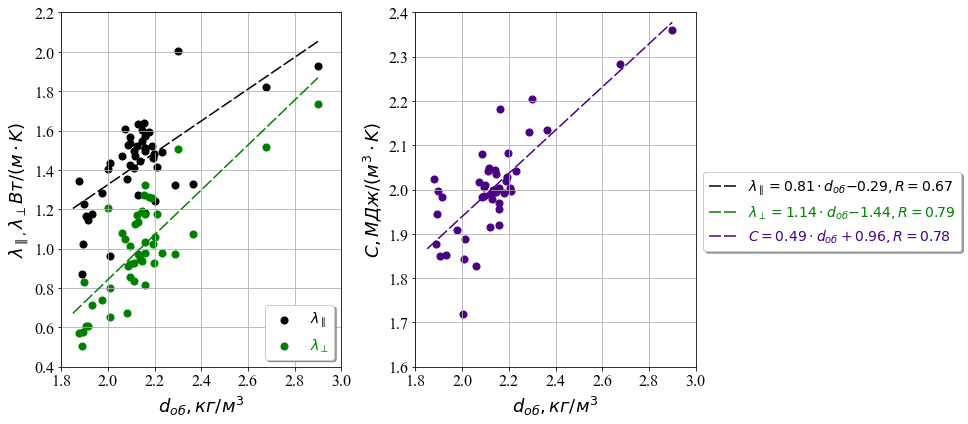

In [116]:
fig = plt.figure(constrained_layout=False, figsize=(10, 6))
# fig.tight_layout(pad=0.001000)
axs = fig.subplots(1, 2,  sharex=False)

ticks_size, label_size = 16, 18

x_value, y1_value, y2_value= "Density", "TC par avg", " TC perp avg"

# df_ues = df_ues_drop

  ### INPUT DATA
axs[0].scatter(df_ues[x_value], df_ues[y1_value], color='Black', s=50, label='$\lambda_{\parallel}$')
axs[0].scatter(df_ues[x_value], df_ues[y2_value], color='Green', s=50, label='$\lambda_{\perp}$')
axs[0].set_xscale("linear")

axs[0].set_xlabel("$d_{об},$"+"$кг/м^{3}$", fontsize=label_size, **csfont, fontweight='bold')
ticks = [1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0]
axs[0].set_xlim([1.8, 3.0])
axs[0].set_xticks(ticks)
axs[0].set_xticklabels(ticks, fontsize=ticks_size, **csfont)

axs[0].grid(which='major', axis='both', linestyle='-')


axs[0].set_ylabel('$\lambda_{\parallel,}\lambda_{\perp} $' + '$ Вт/({м}\cdot{K})$', fontsize=label_size, **csfont, fontweight='bold')

y_ticks= [0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2]
axs[0].set_ylim([0.4, 2.2])
axs[0].set_yticks(y_ticks)
axs[0].set_yticklabels(y_ticks, fontsize=ticks_size, **csfont)

axs[0].legend(loc='lower right',
              fancybox=True, shadow=True, ncol=1, fontsize=14, labelcolor=['Black', 'Green'])

        ### Correlation
def func (x, w, b):
    return b+x*w
    
def parr(x):
    return -0.29168519 + 0.8083437*x

def perp(x):
    return -1.4379736 + 1.13993552*x

parr_coeff = [0.8083437, -0.29168519]
parr_r = 0.6713415196779645

perp_coeff = (1.13993552, -1.4379736)
perp_r = 0.7935890266027279


   

    ### FIGURE 2 

### INPUT DATA

x_value, y_value = "Density", "VHC"

axs[1].scatter(df_ues[x_value], df_ues[y_value], color='indigo', s=50)
axs[1].set_xscale("linear")

axs[1].set_xlabel("$d_{об},$"+"$кг/м^{3}$", fontsize=label_size, **csfont, fontweight='bold')
ticks = [1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0]
axs[1].set_xlim([1.8, 3.0])
axs[1].set_xticks(ticks)
axs[1].set_xticklabels(ticks, fontsize=ticks_size, **csfont)

axs[1].grid(which='major', axis='both', linestyle='-')


axs[1].set_ylabel('$C,$'+'$МДж/({м^{3}}\cdot{K})$', 
                  fontsize=label_size, **csfont, fontweight='bold')

y_ticks= [1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4]
axs[1].set_ylim([1.6, 2.4])
axs[1].set_yticks(y_ticks)
axs[1].set_yticklabels(y_ticks, fontsize=ticks_size, **csfont)

    
# sort = df_ues.sort_values(by=x_value) 
# xdata_ar, ydata_ar = sort[x_value], sort[y_value]
# popt_n, pcov_n = curve_fit(func, xdata_ar, ydata_ar)
# print('Коэффициенты в уравнении', popt_n) # коэффициенты в уравнении
# coeff_n = np.corrcoef(xdata_ar, ydata_ar)[0, 1]
# print('Коэффициент корреляции', np.corrcoef(xdata_ar, ydata_ar)[0, 1])
# n = np.corrcoef(xdata_ar, ydata_ar)[0, 1]
# print('Значимость по Пирсону (для линейной корреляции)', pearsonr(xdata_ar, ydata_ar))


def all_vhc(x):
    return 0.96473265 + 0.48720393*x

vhc_coeff = [0.48720393, 0.96473265]
vhc_r = 0.7816367761220617


 
plt.tight_layout()

x_value = np.linspace(1.85, 2.9, 30)
y_pred = parr(x_value)
line1, = axs[0].plot(x_value, y_pred, 
            dashes=[8, 2],
            color='Black', 
           label='$\lambda_{\parallel}=%5.2f\cdot{d_{об}}{%5.2f},  \
            $' % tuple(parr_coeff) +'$R={%5.2f}$'%(parr_r))

y_pred = perp(x_value)
line2, = axs[0].plot(x_value, y_pred, 
            dashes=[8, 2],
            color='Green', 
            label='$\lambda_{\perp}=%5.2f\cdot{d_{об}}{%5.2f}, \
            $' % tuple(perp_coeff) +'$R={%5.2f}$'%(perp_r)
           )

y_pred = all_vhc(x_value)
line3, = axs[1].plot(x_value, y_pred, 
            dashes=[8, 2],
            color='indigo', 
            label='$C=%5.2f\cdot{d_{об}}+{%5.2f}, \
            $' % tuple(vhc_coeff) +'$R={%5.2f}$'%(vhc_r)
           )


label_font_weight='bold'

legend3 = fig.legend(
                    handles=[line1, line2, line3], 
                    loc='center right',
                     fancybox=True, shadow=True, ncol=1,
                     fontsize=14,
                    labelcolor=['Black', 'Green', "indigo"],
                    bbox_to_anchor=(1.35, 0.5)
                    )




plt.savefig('india#2_dens_VHC.jpg', dpi=300, bbox_inches='tight')

import warnings
warnings.filterwarnings("ignore", message="No artists with labels found to put in legend")


plt.show()